In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add project root to path
sys.path.append(os.path.abspath('../'))

from locobench.visualizations.multi_plotter import *
from locobench.analysis.numerical_analysis import categorize_paths_by_root



In [2]:
os.chdir("../")
#os.getcwd() # must point to project root (LoCoBench)

In [3]:
language_order = ["en", "zh", "de", "it", "ko", "hi"]
PATHS_MGTE_MONO, PATHS_MGTE_MULTI = categorize_paths_by_root("results/wiki_parallel","Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__", language_order=language_order)
PATHS_MGTE = PATHS_MGTE_MONO + PATHS_MGTE_MULTI

PATHS_JINA_MONO, PATHS_JINA_MULTI = categorize_paths_by_root("results/wiki_parallel","jinaai_jina-embeddings-v3__wiki_parallel_en_de_hi_it_ko_zh__parallel__", language_order=language_order)
PATHS_JINA = PATHS_JINA_MONO + PATHS_JINA_MULTI


position_plotter = DocumentLevel2SegmentStandaloneSimPlotter()
latechunk2standalone_plotter = SegmentLatechunk2SegmentStandaloneSimPlotter()
PATHS_MONO = PATHS_JINA_MONO + PATHS_MGTE_MONO 
PATHS_MULTI = PATHS_JINA_MULTI + PATHS_MGTE_MULTI

print(f"MGTE monolingual paths: {len(PATHS_MGTE_MONO)}")
print(f"MGTE multilingual paths: {len(PATHS_MGTE_MULTI)}")
print(f"Jina monolingual paths: {len(PATHS_JINA_MONO)}")
print(f"Jina multilingual paths: {len(PATHS_JINA_MULTI)}")


model_pooling_strats = {
    "Alibaba-NLP/gte-multilingual-base": "cls",
    "jinaai/jina-embeddings-v3": "mean",
    "Qwen/Qwen3-Embedding-0.6B": "cls"
}

MGTE monolingual paths: 24
MGTE multilingual paths: 80
Jina monolingual paths: 24
Jina multilingual paths: 80


# Plots Experiment 1

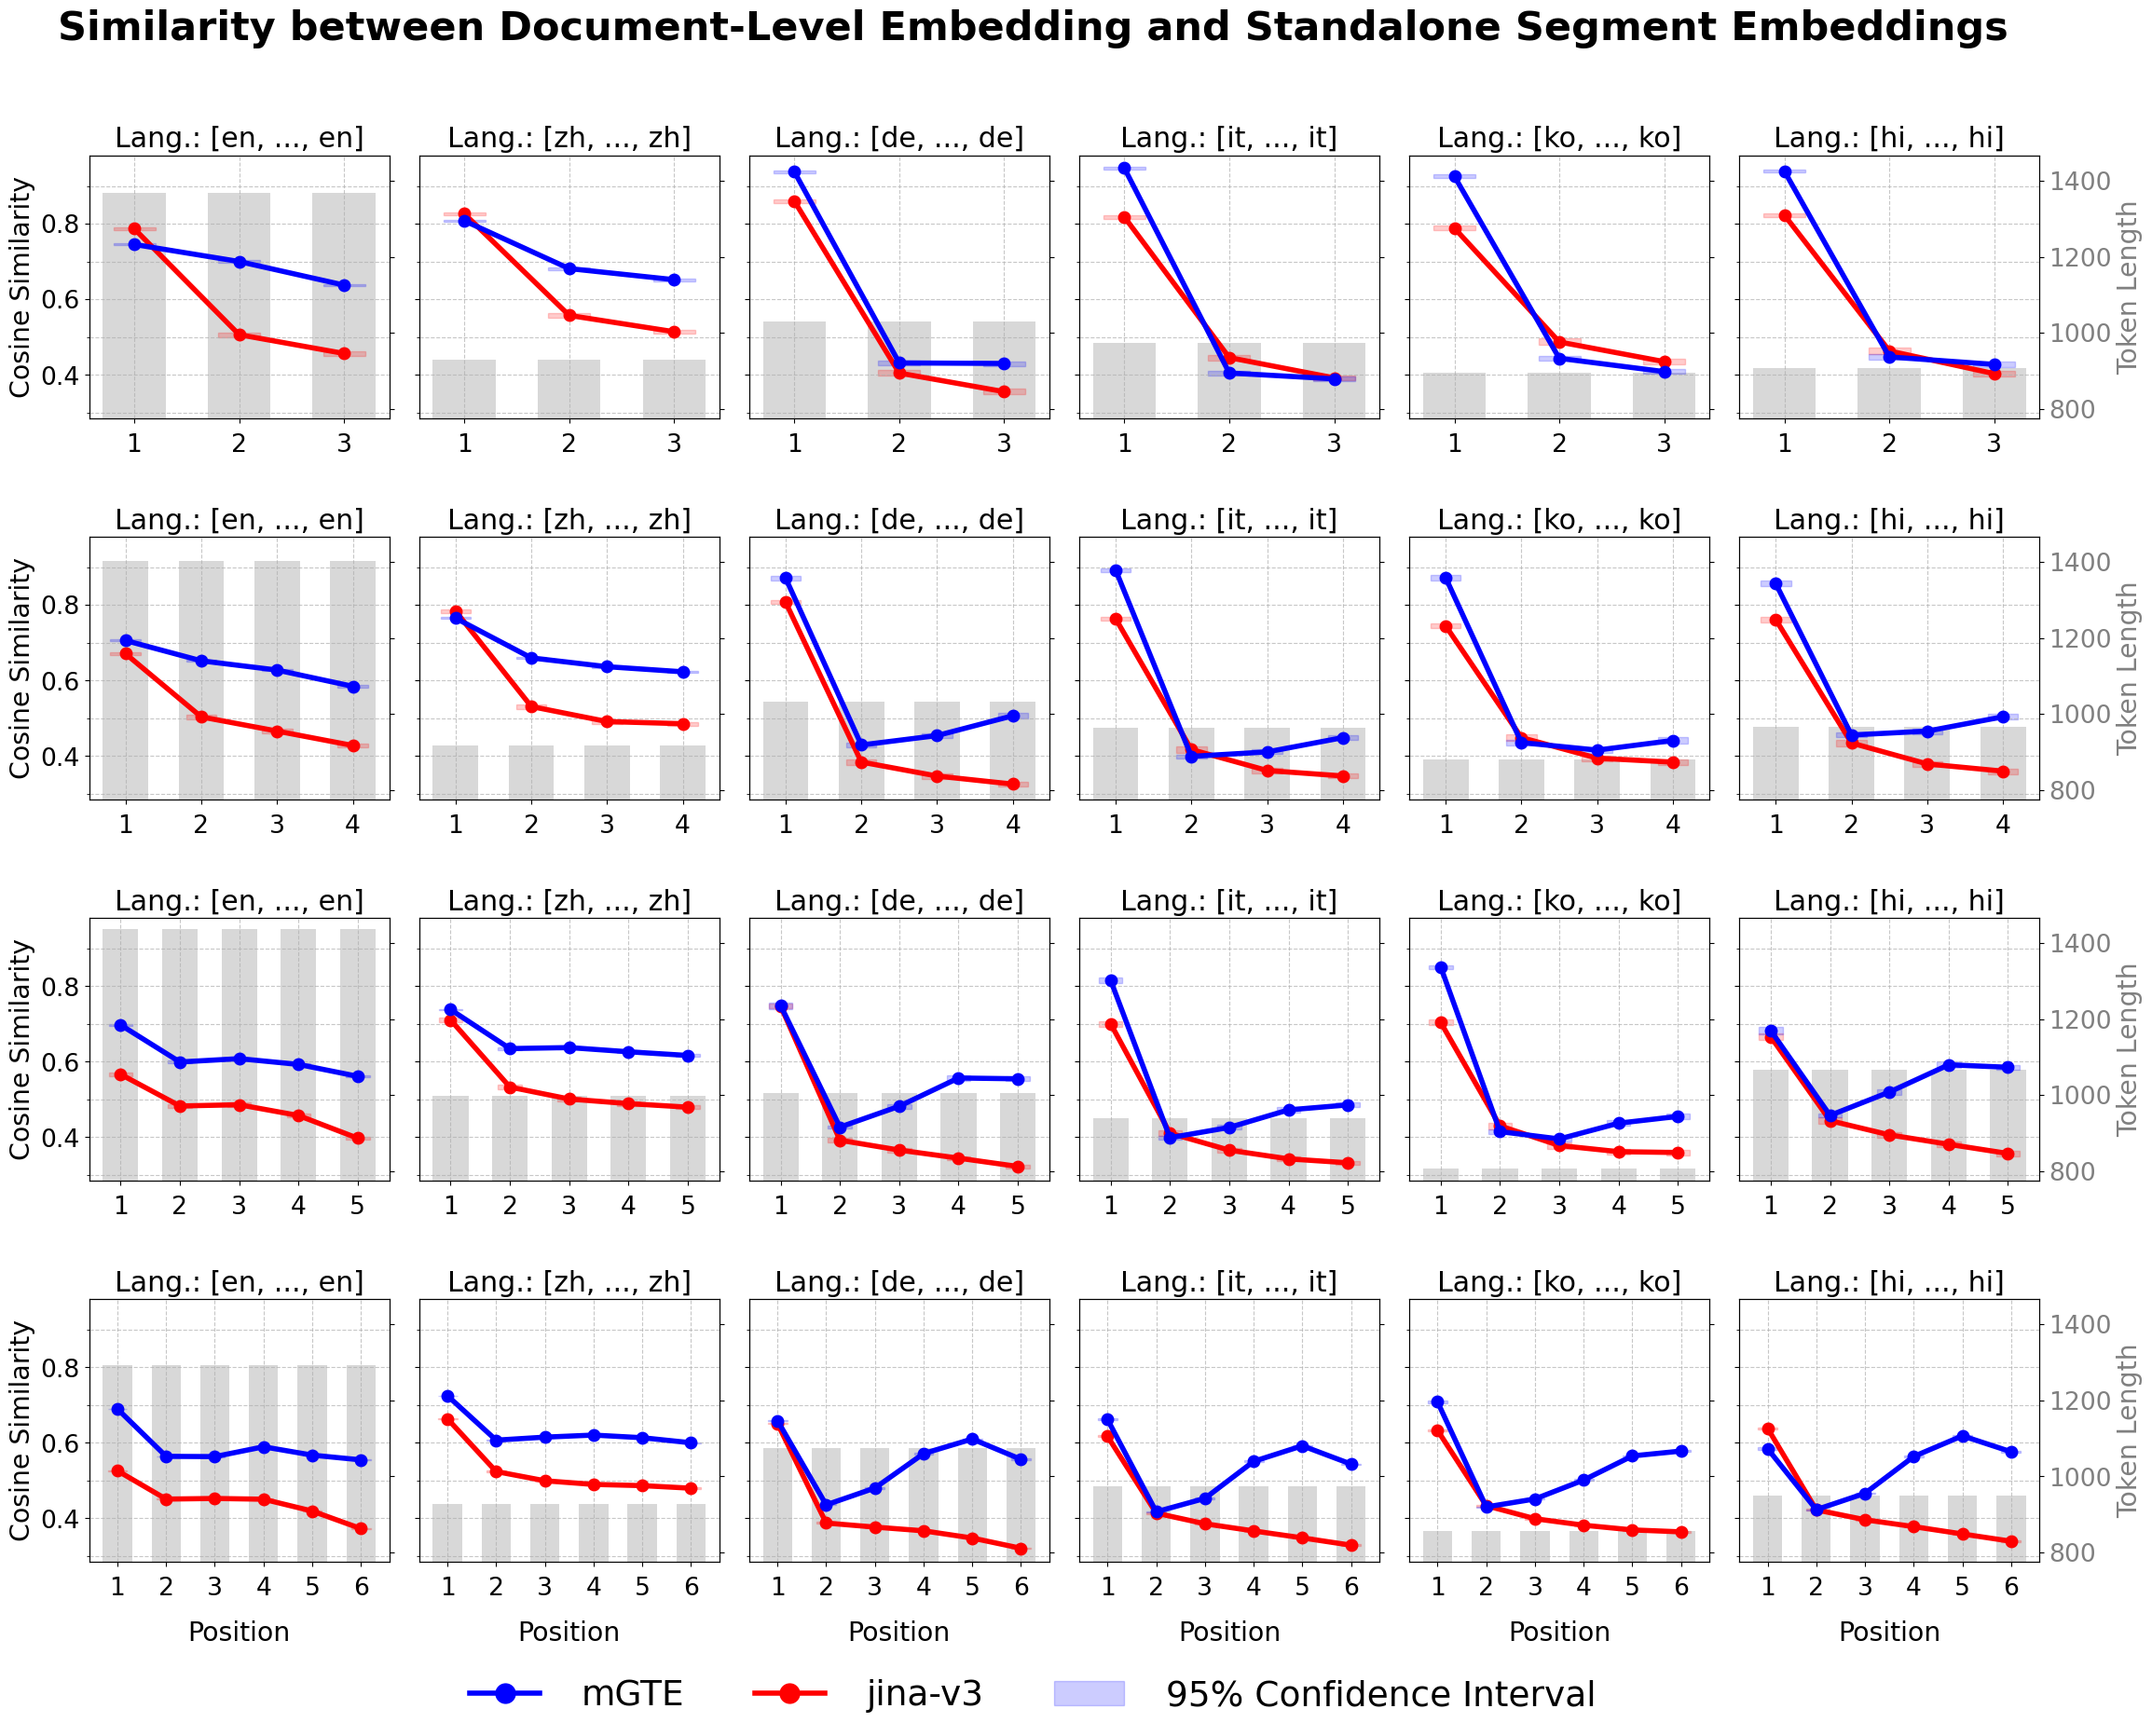

In [4]:
position_plotter.plot_multi_models(
    paths=PATHS_MONO,
    model_pooling_strats=model_pooling_strats,
    show_lengths=True
    )

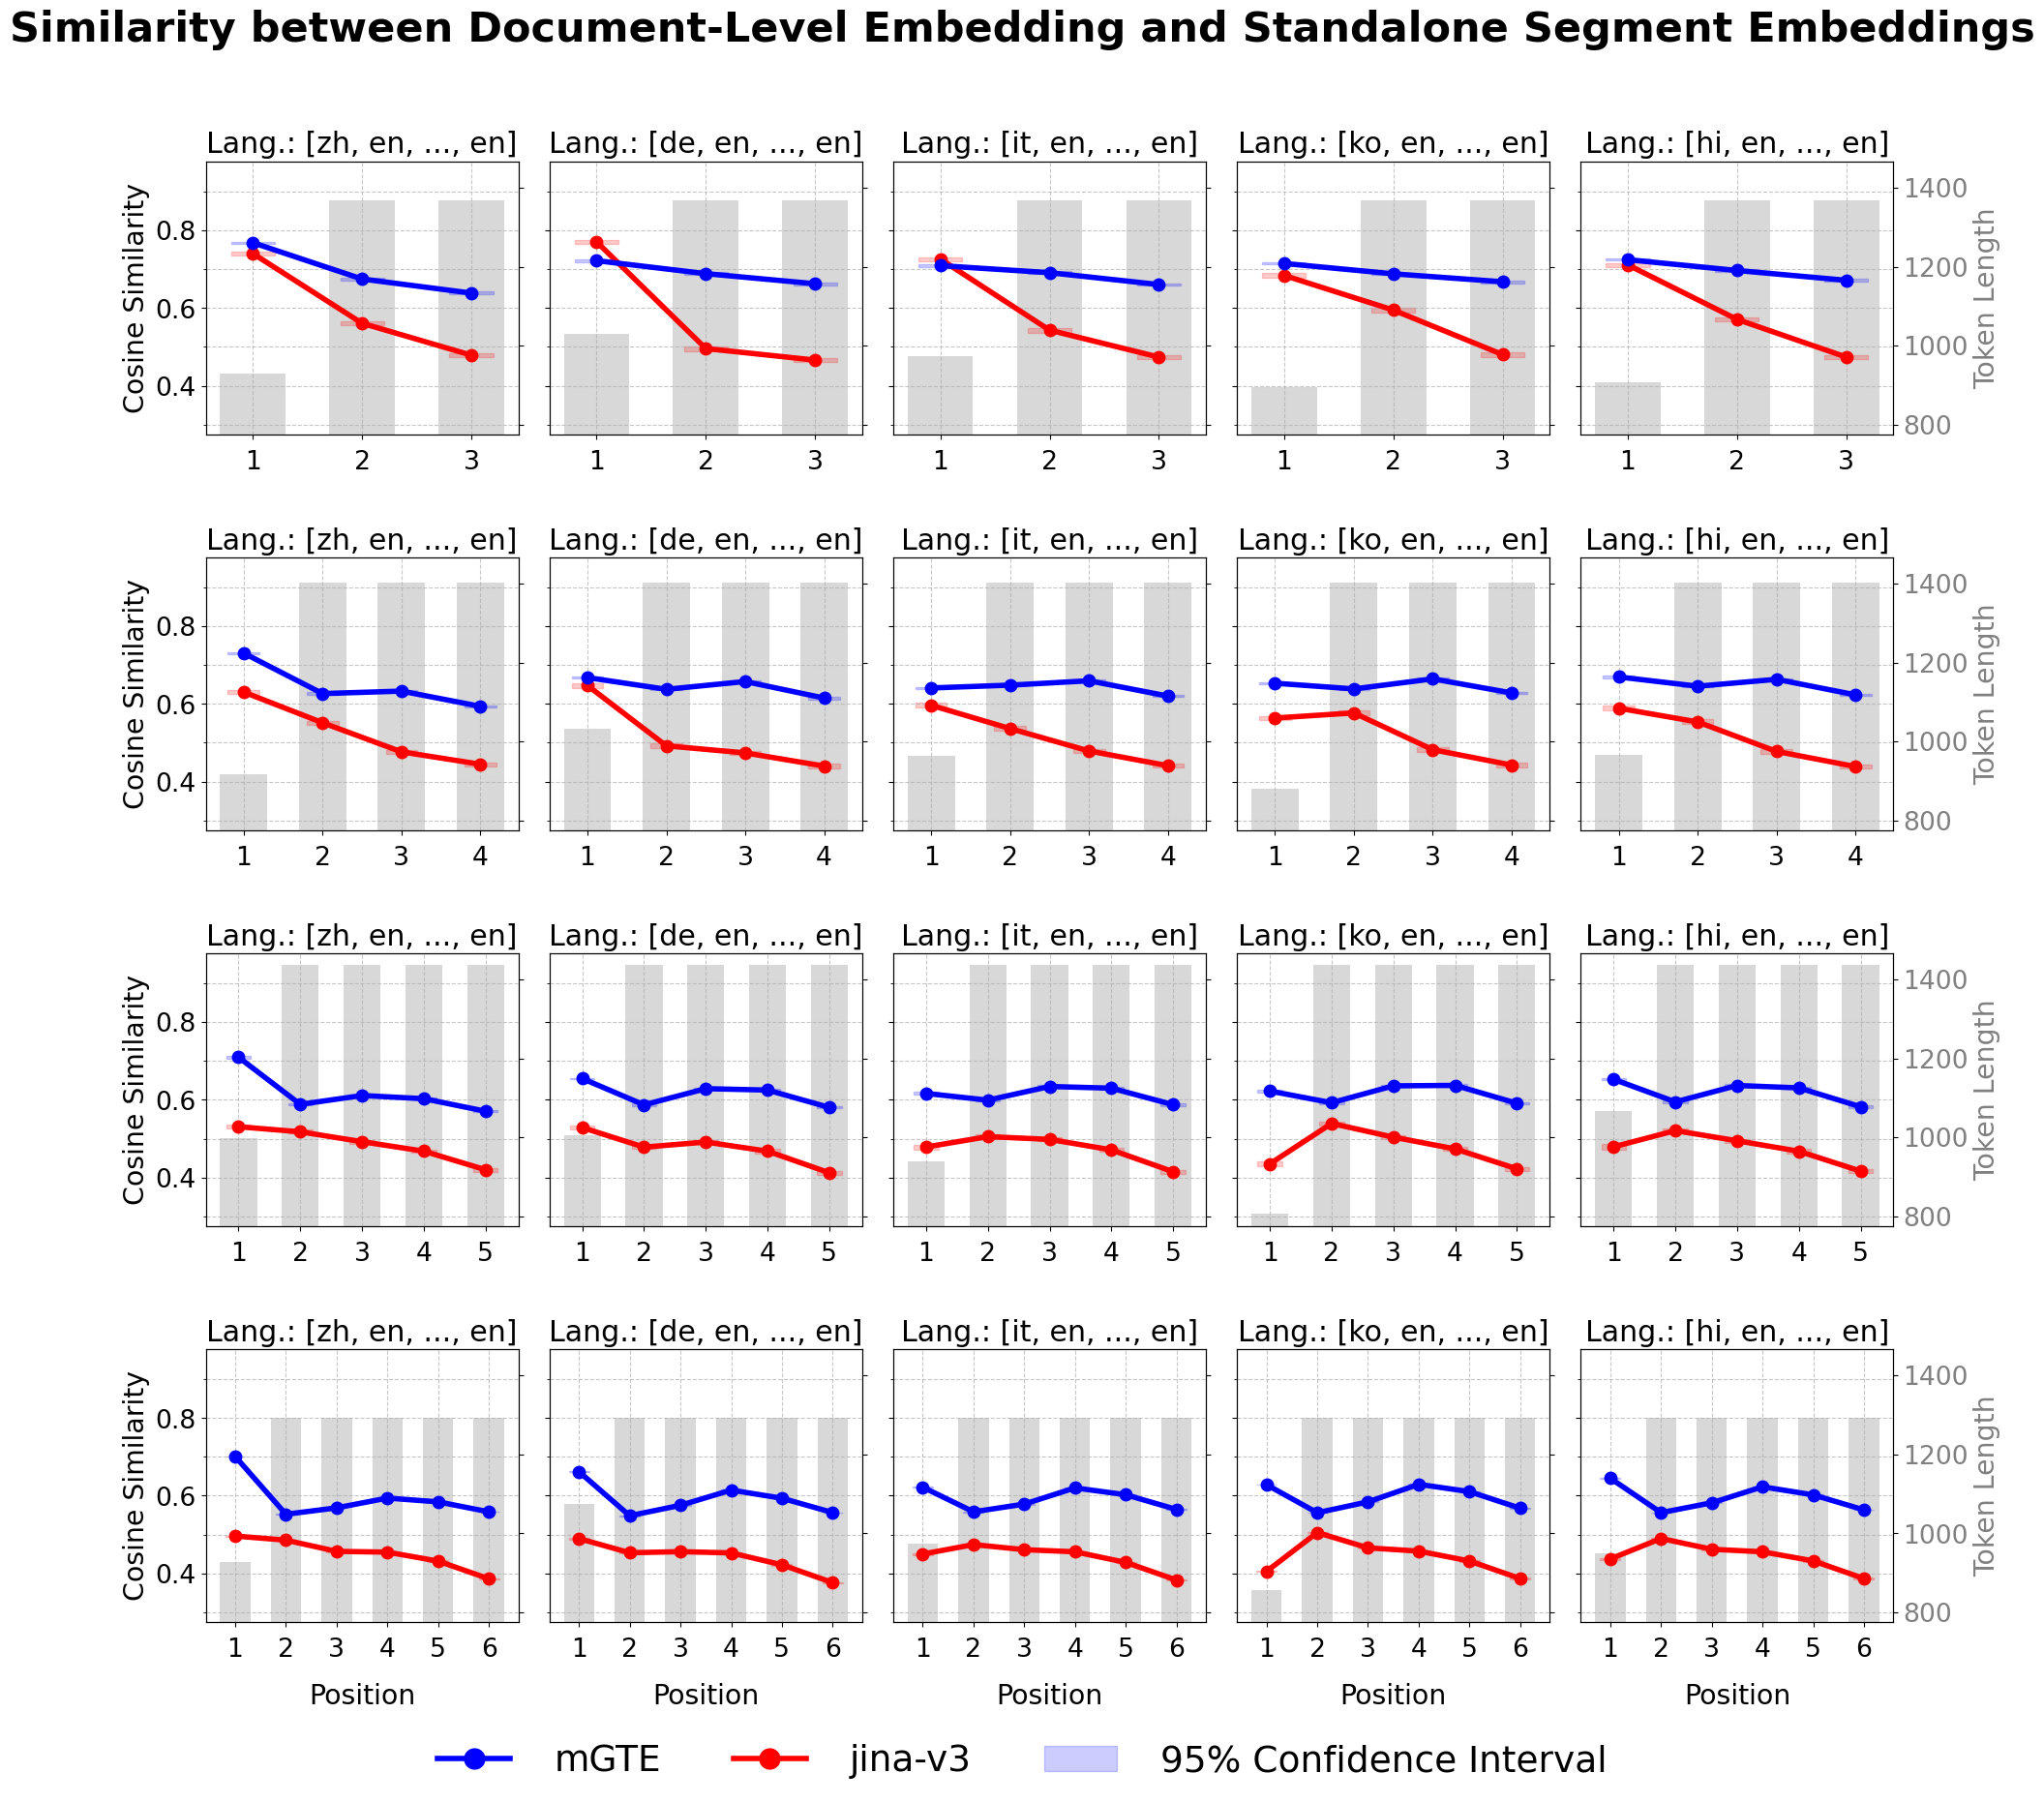

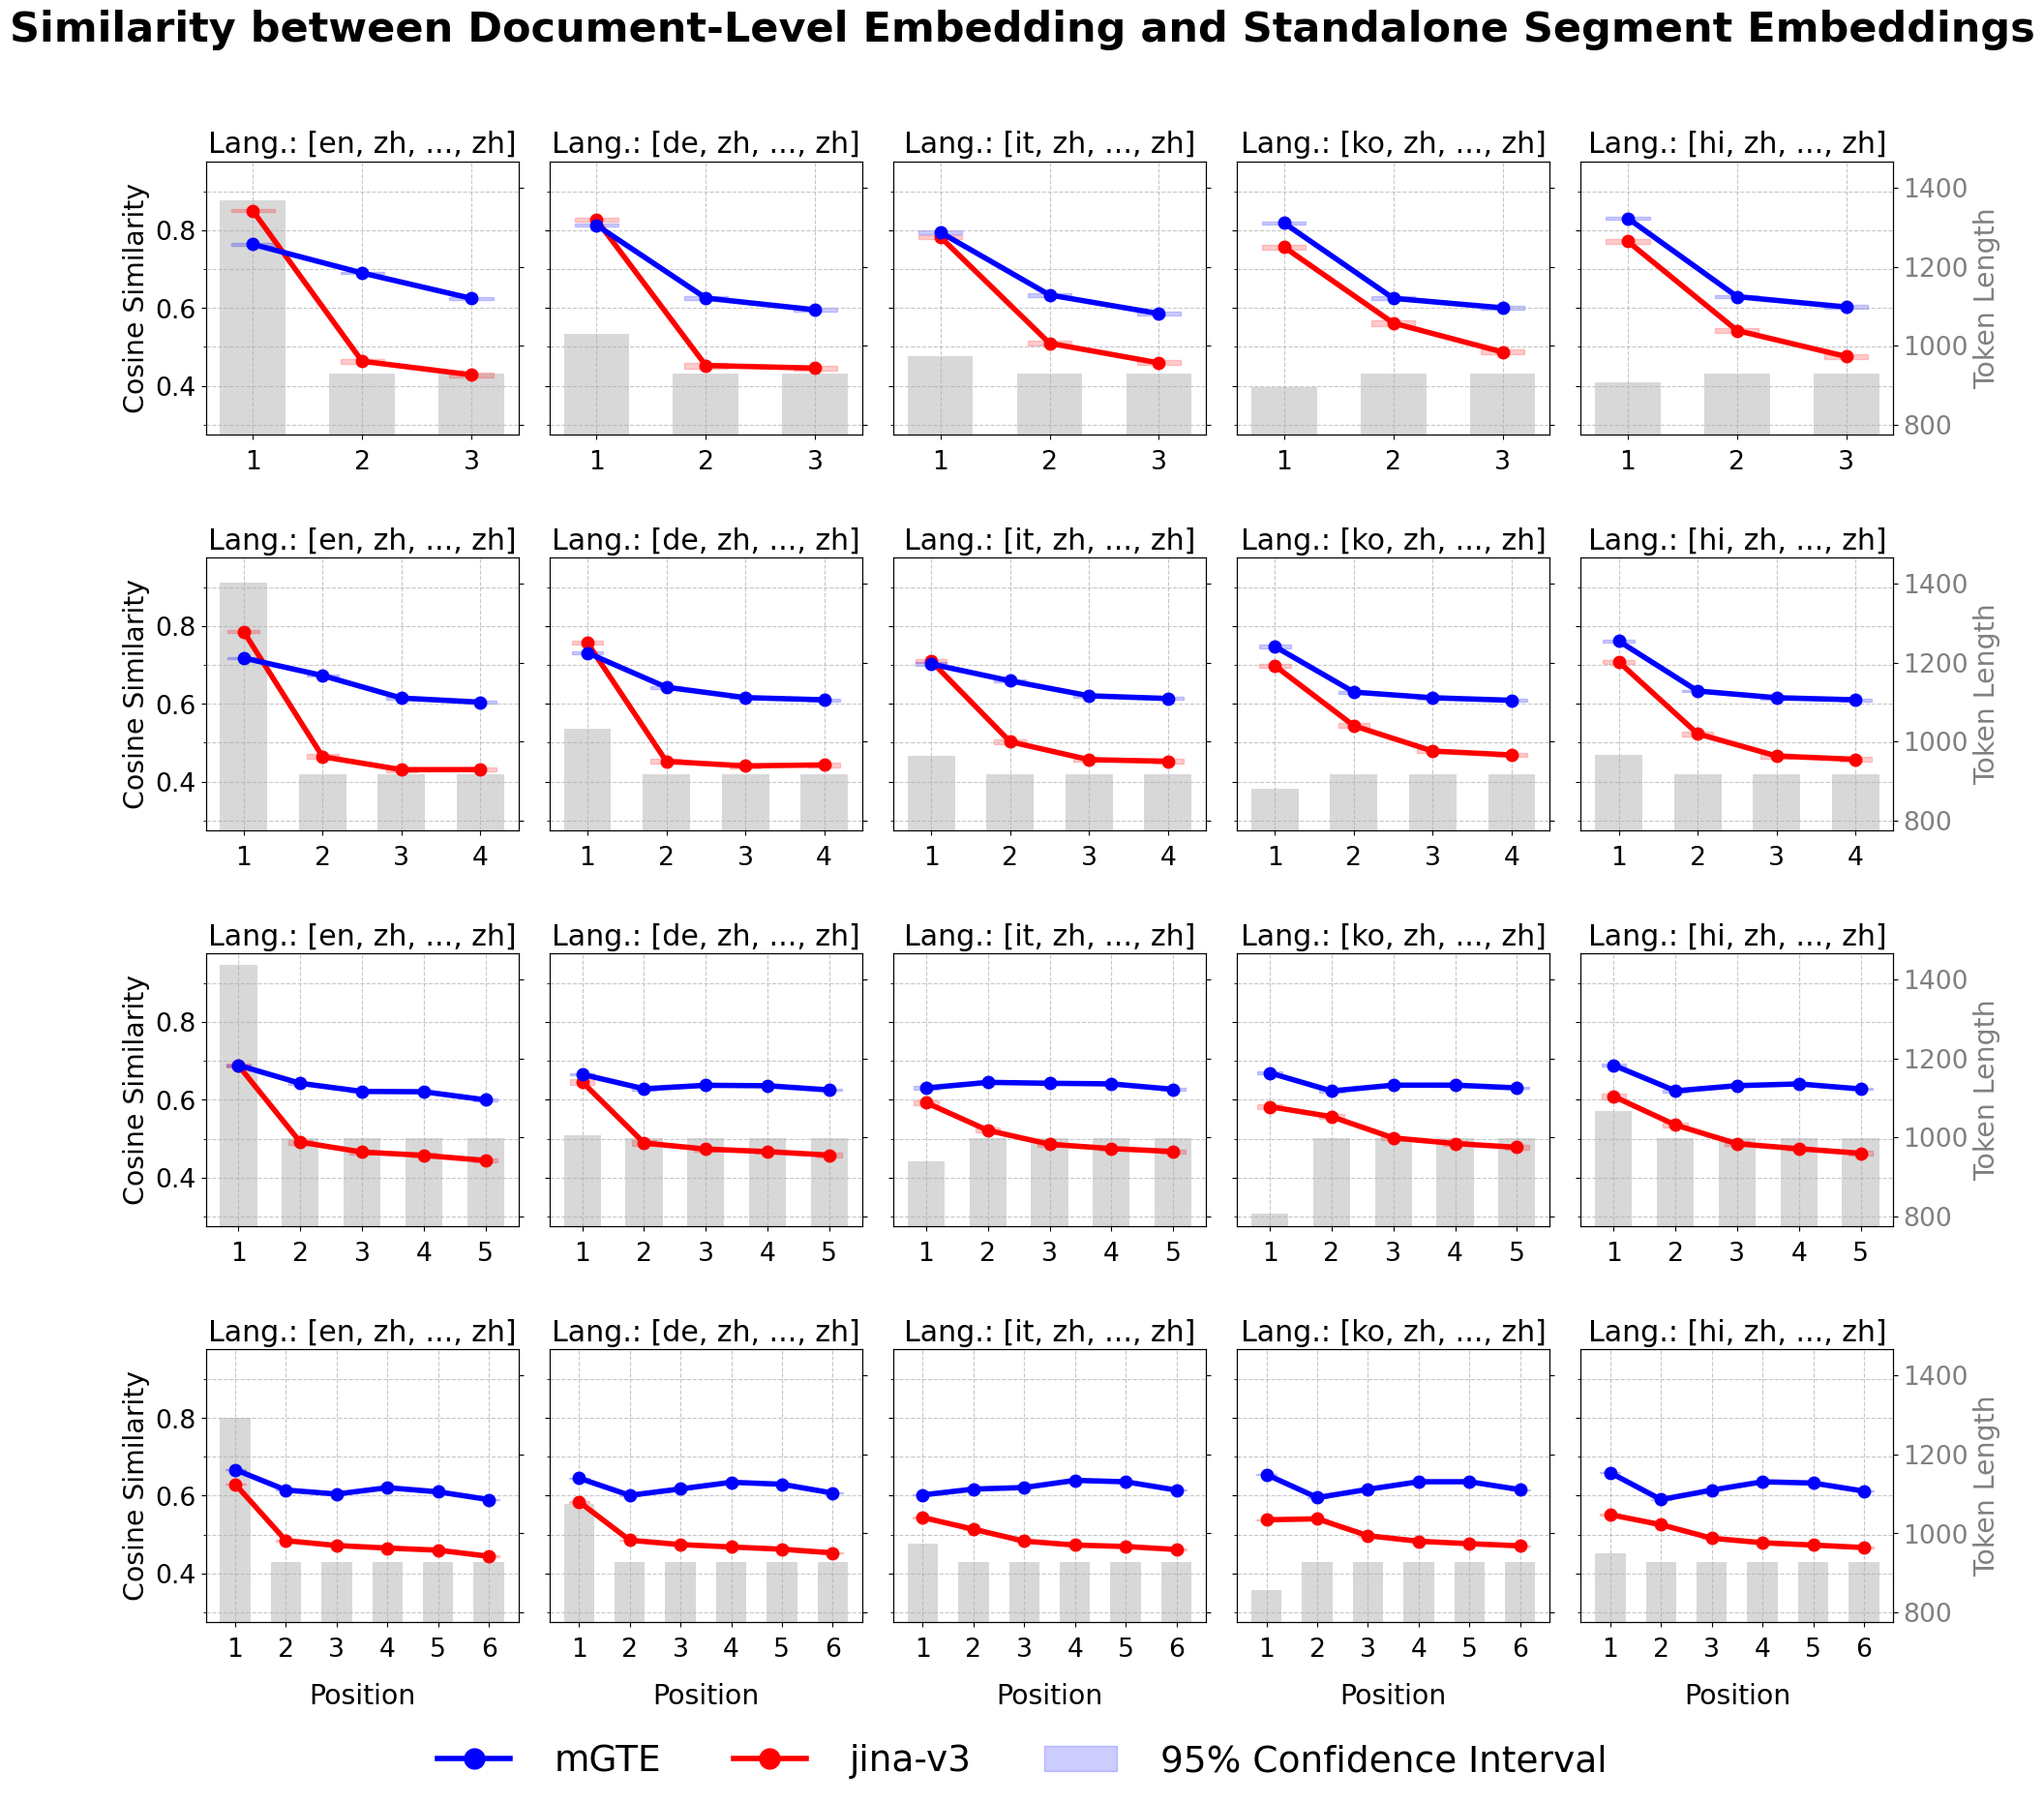

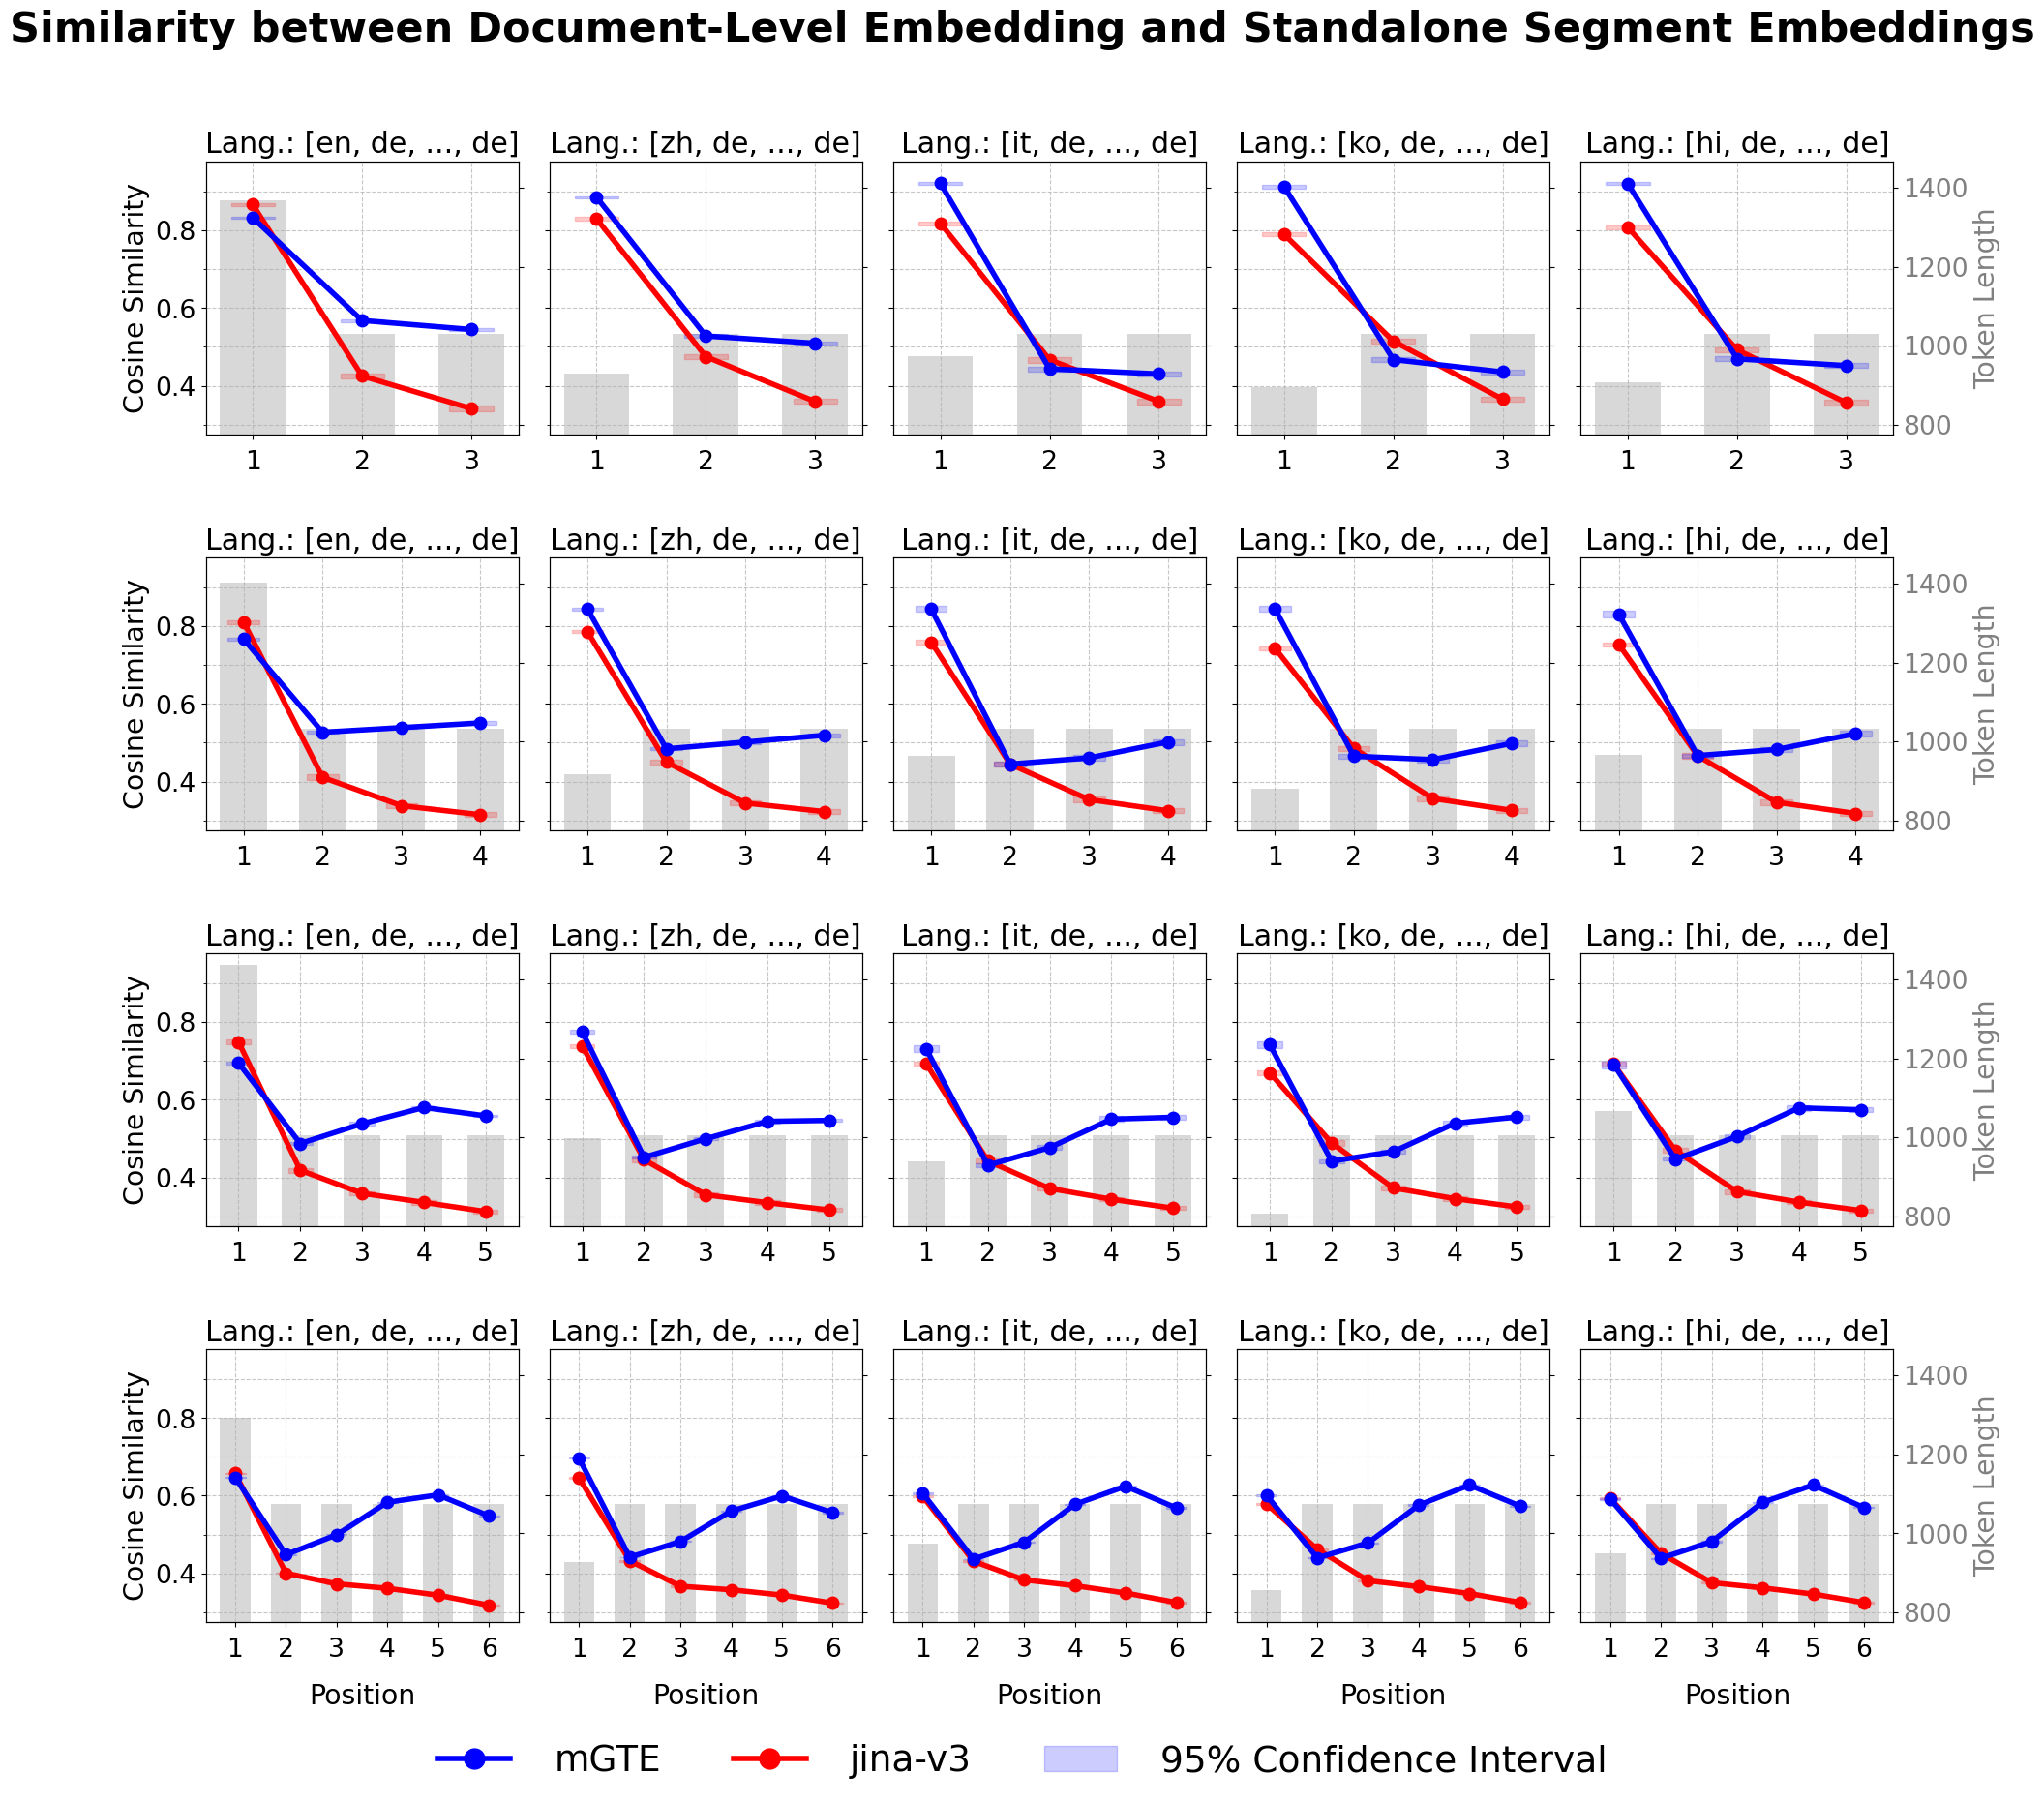

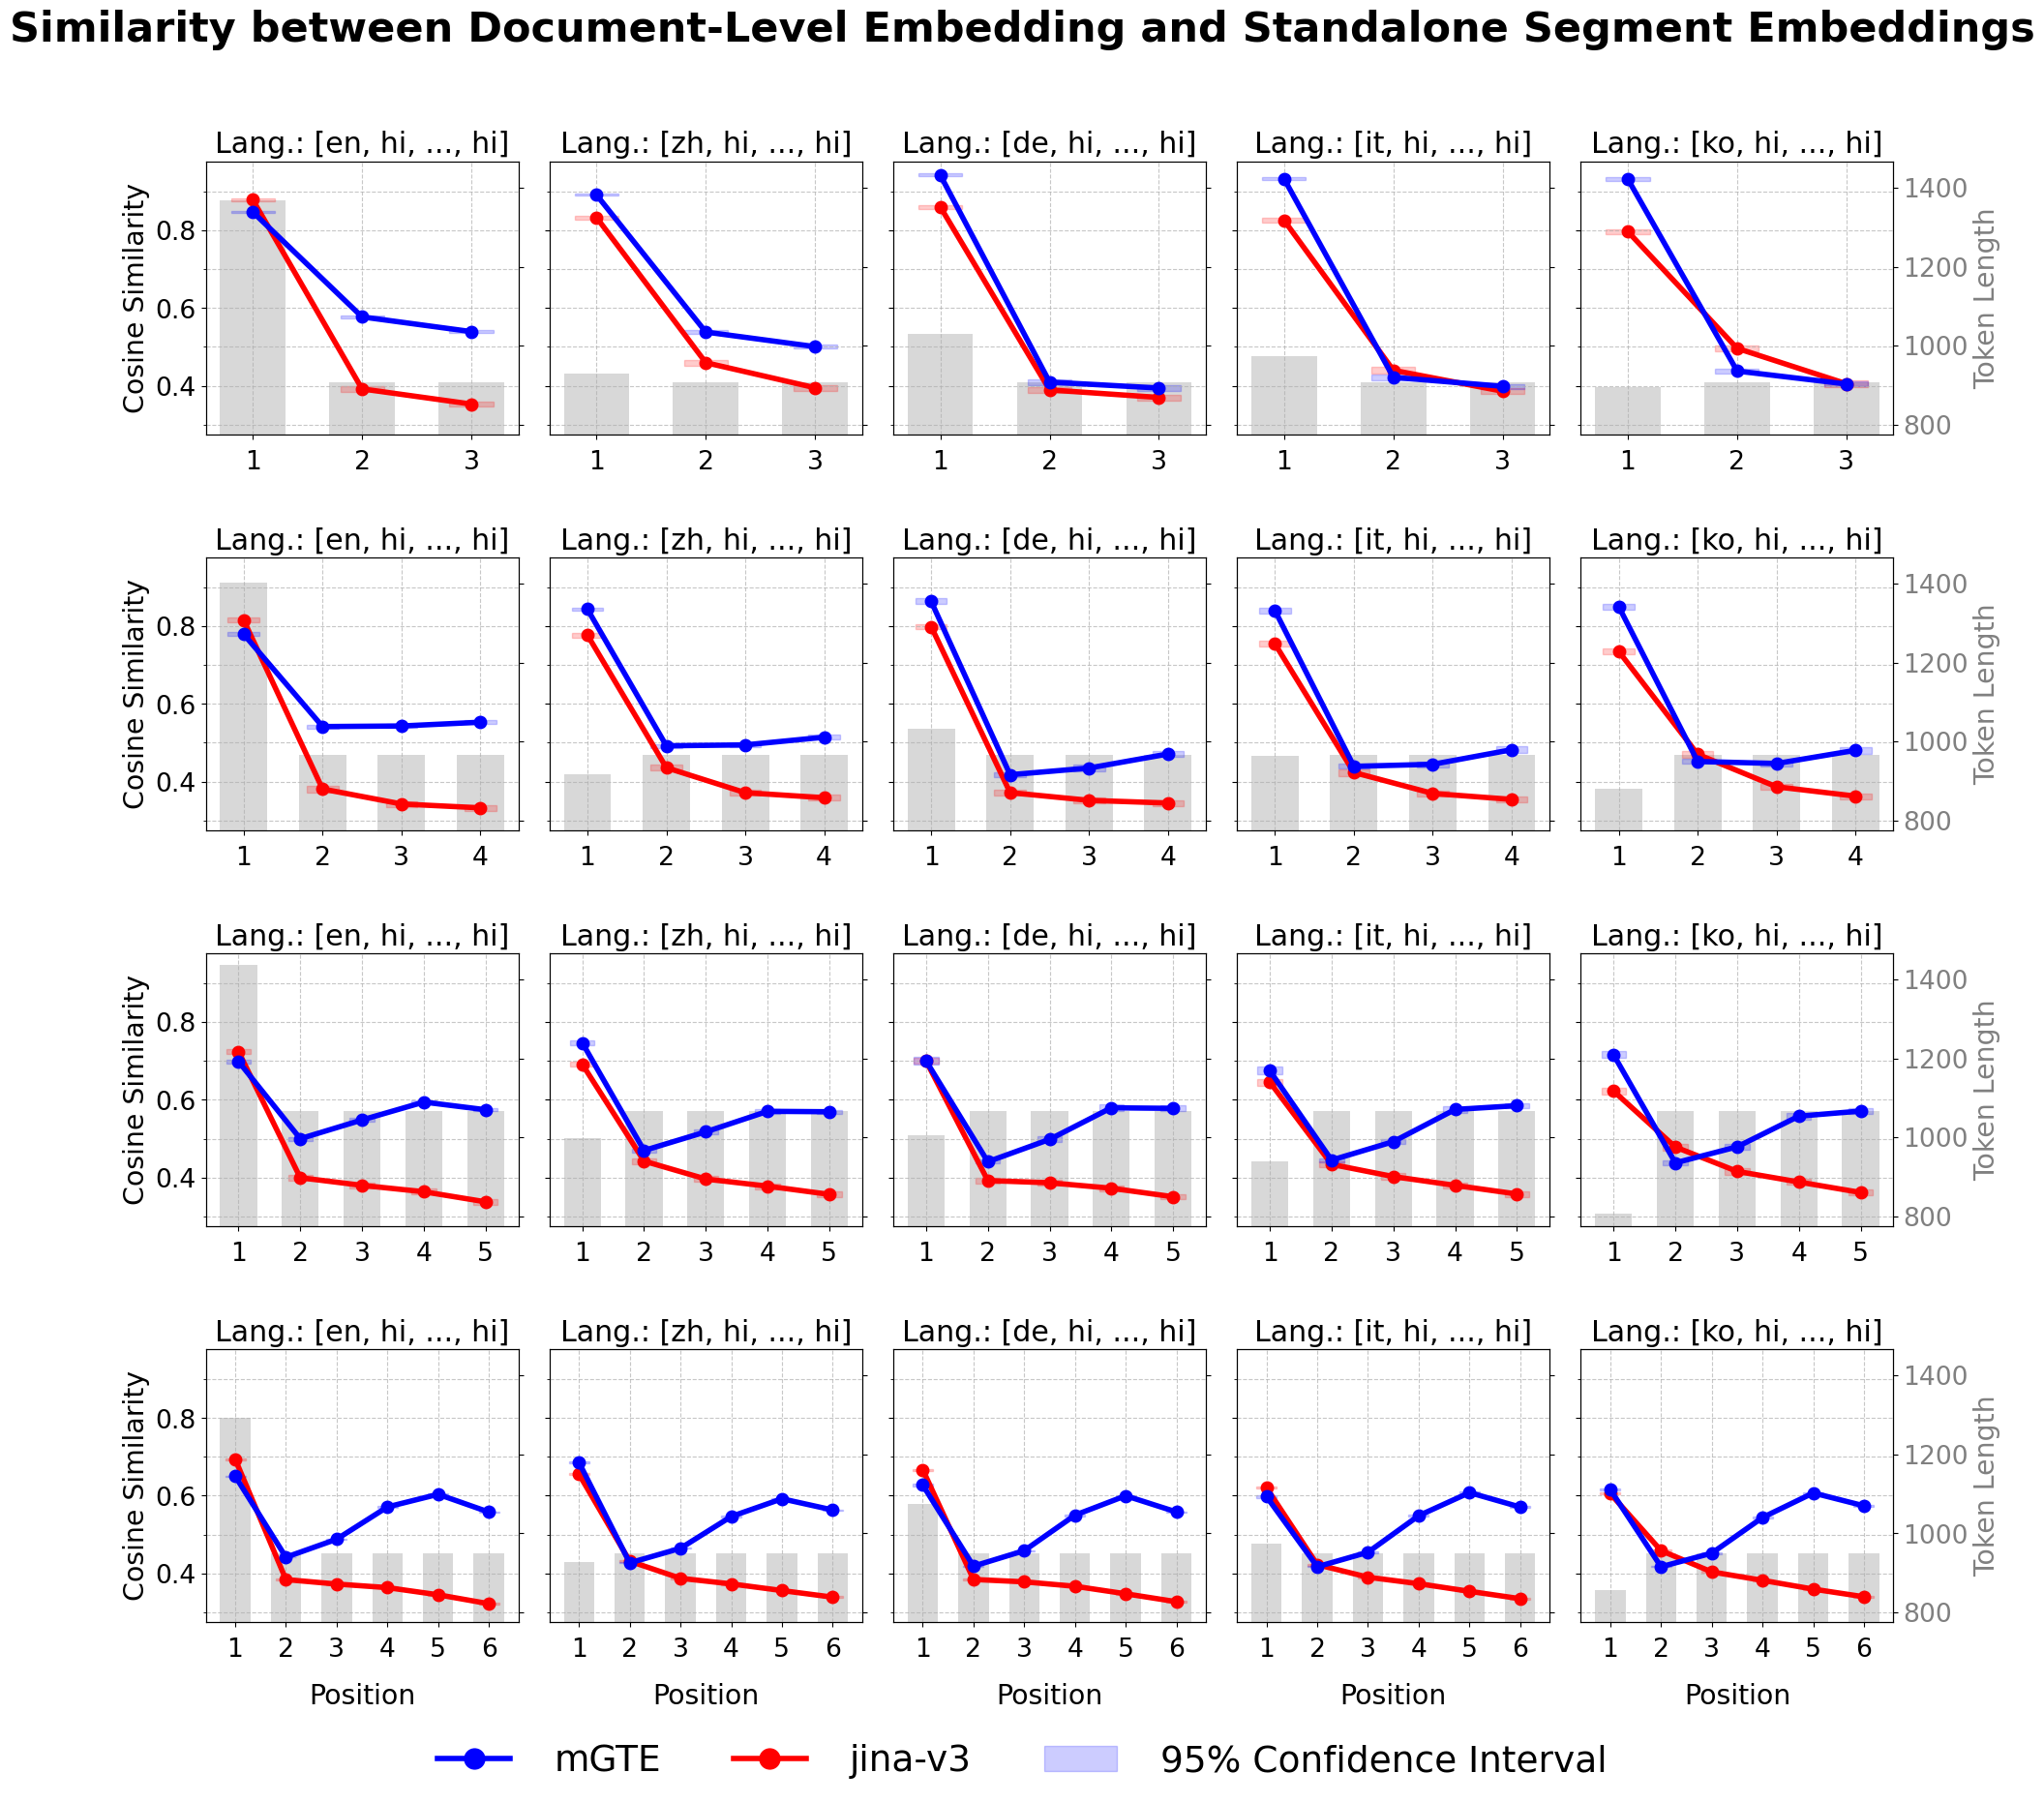

In [5]:
position_plotter.plot_multi_models(
    paths=PATHS_MULTI,
    model_pooling_strats=model_pooling_strats,
    show_lengths=True,
    split_plots_by_source_lang=True
)

# Plots Experiment 2

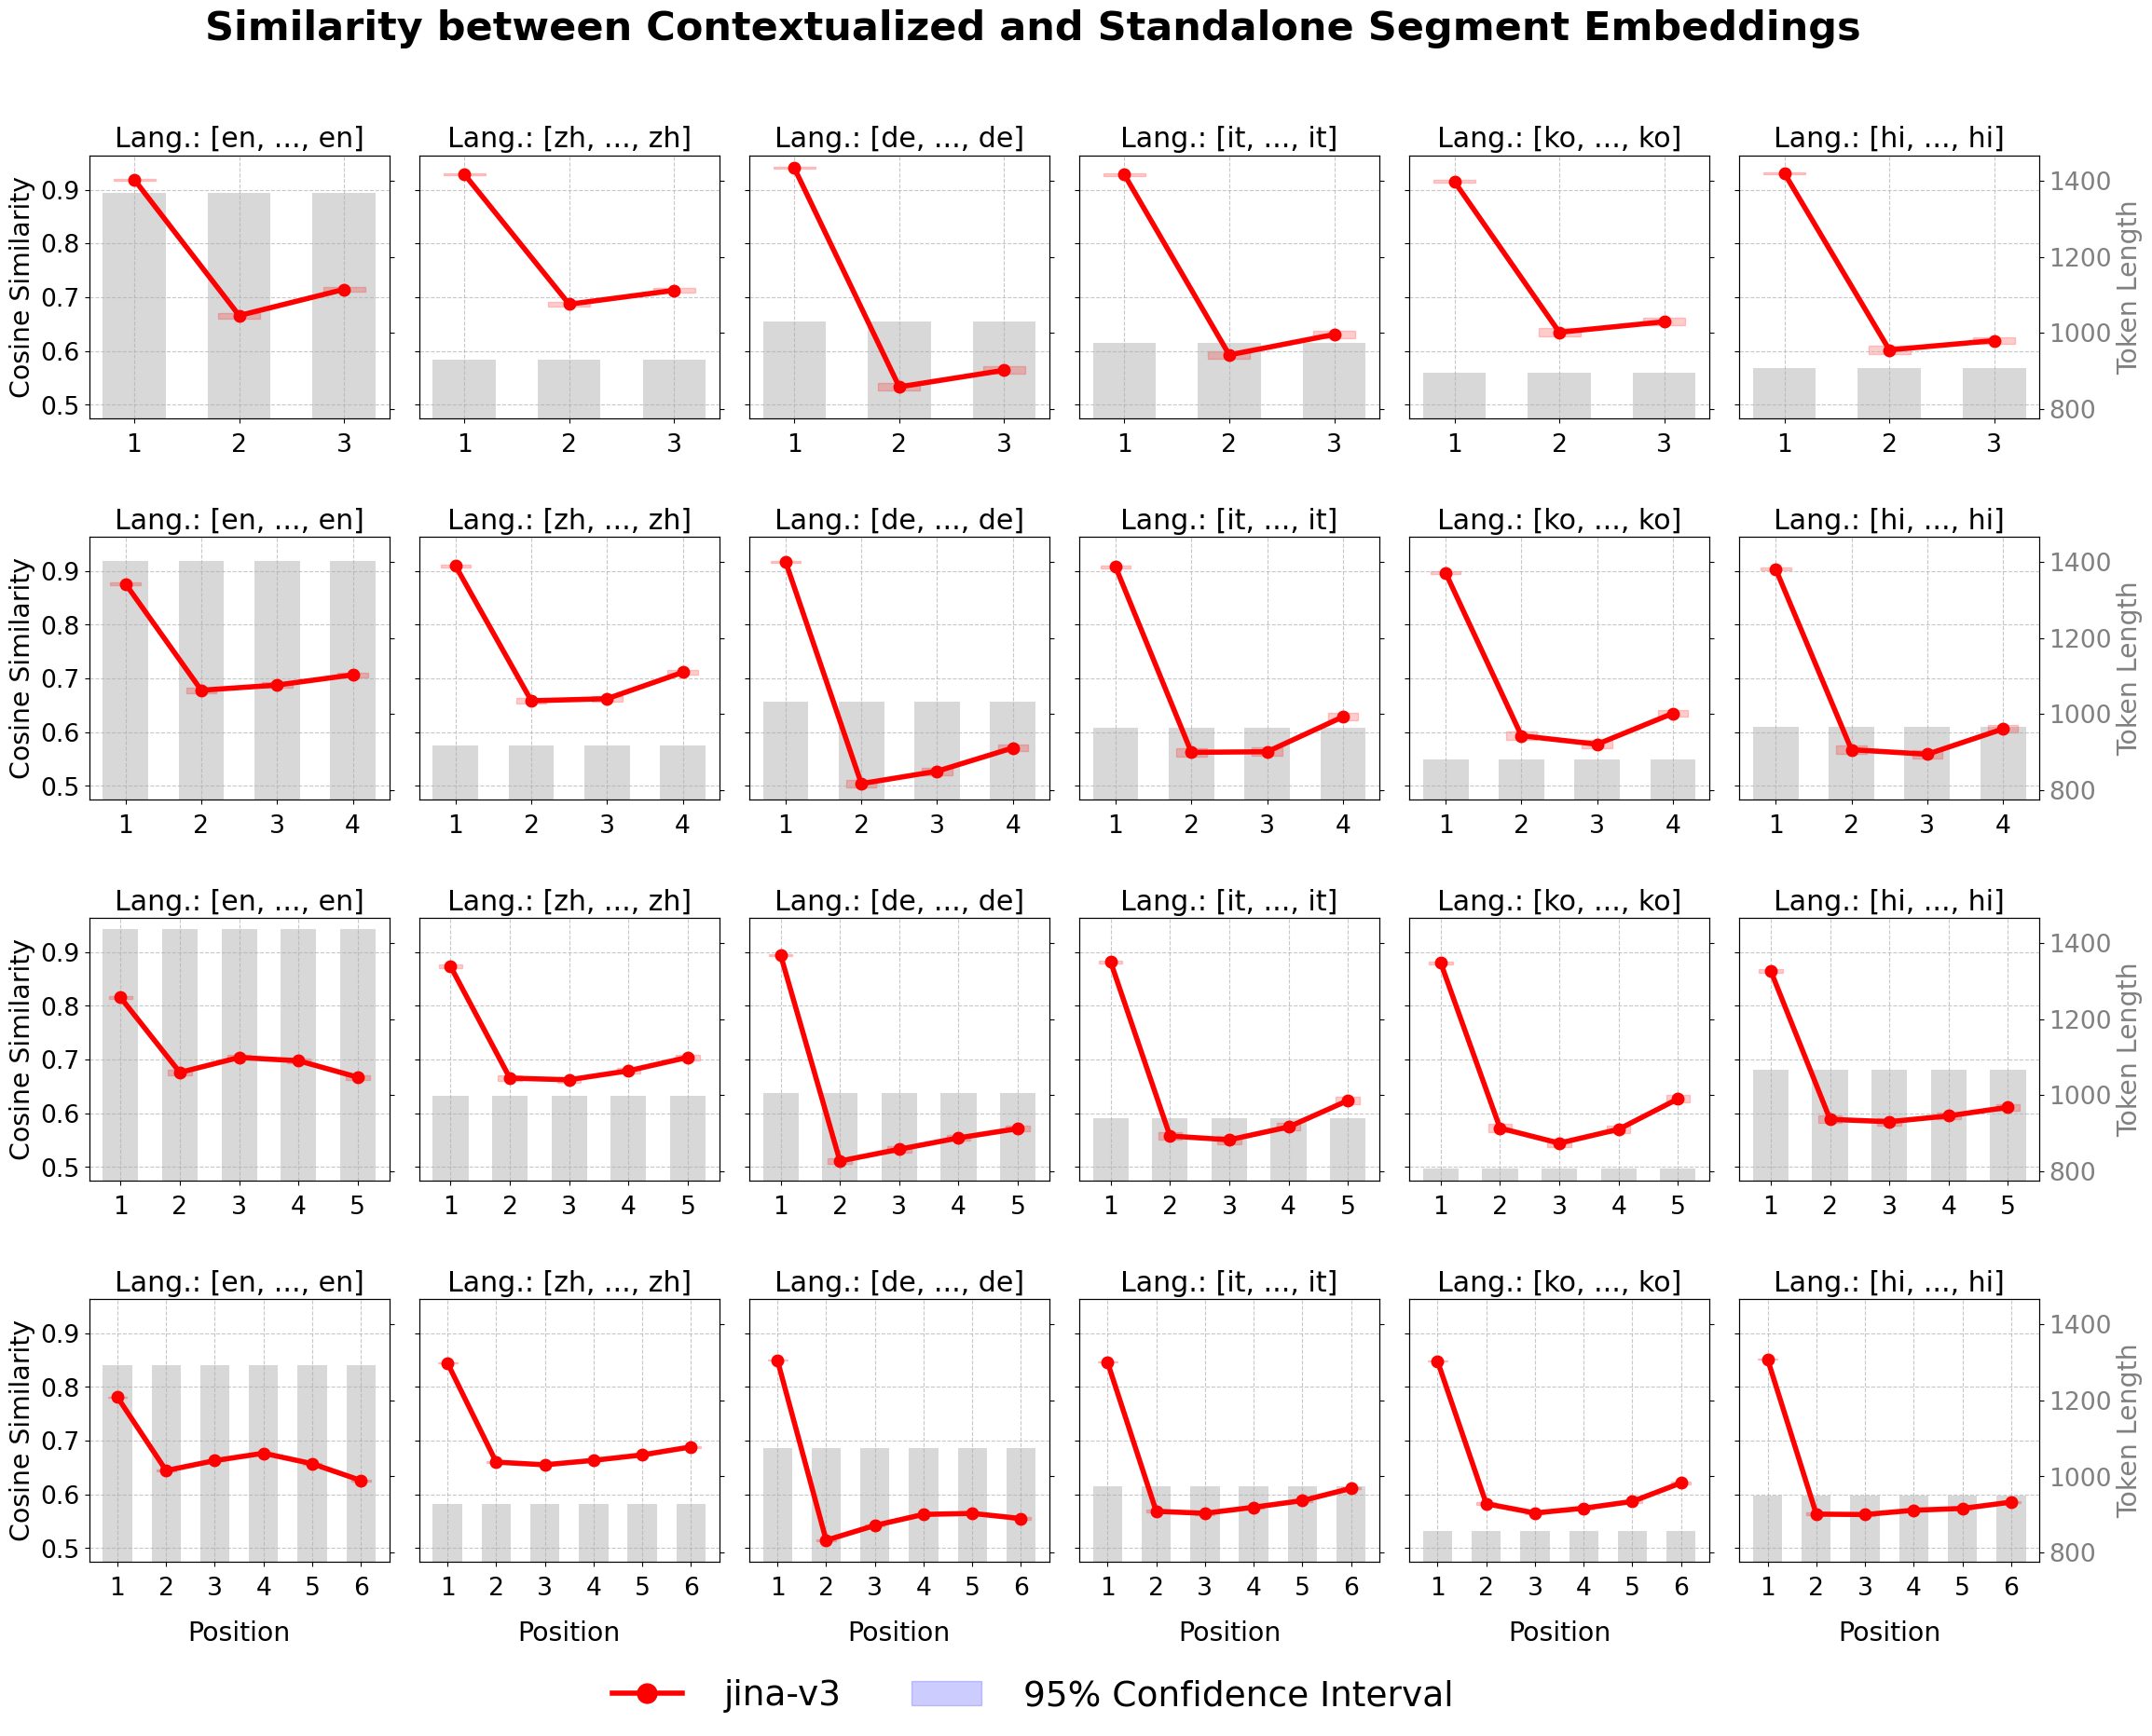

In [6]:
latechunk2standalone_plotter.plot(PATHS_JINA_MONO, pooling_strategy_segment_standalone="mean", show_lengths=True)

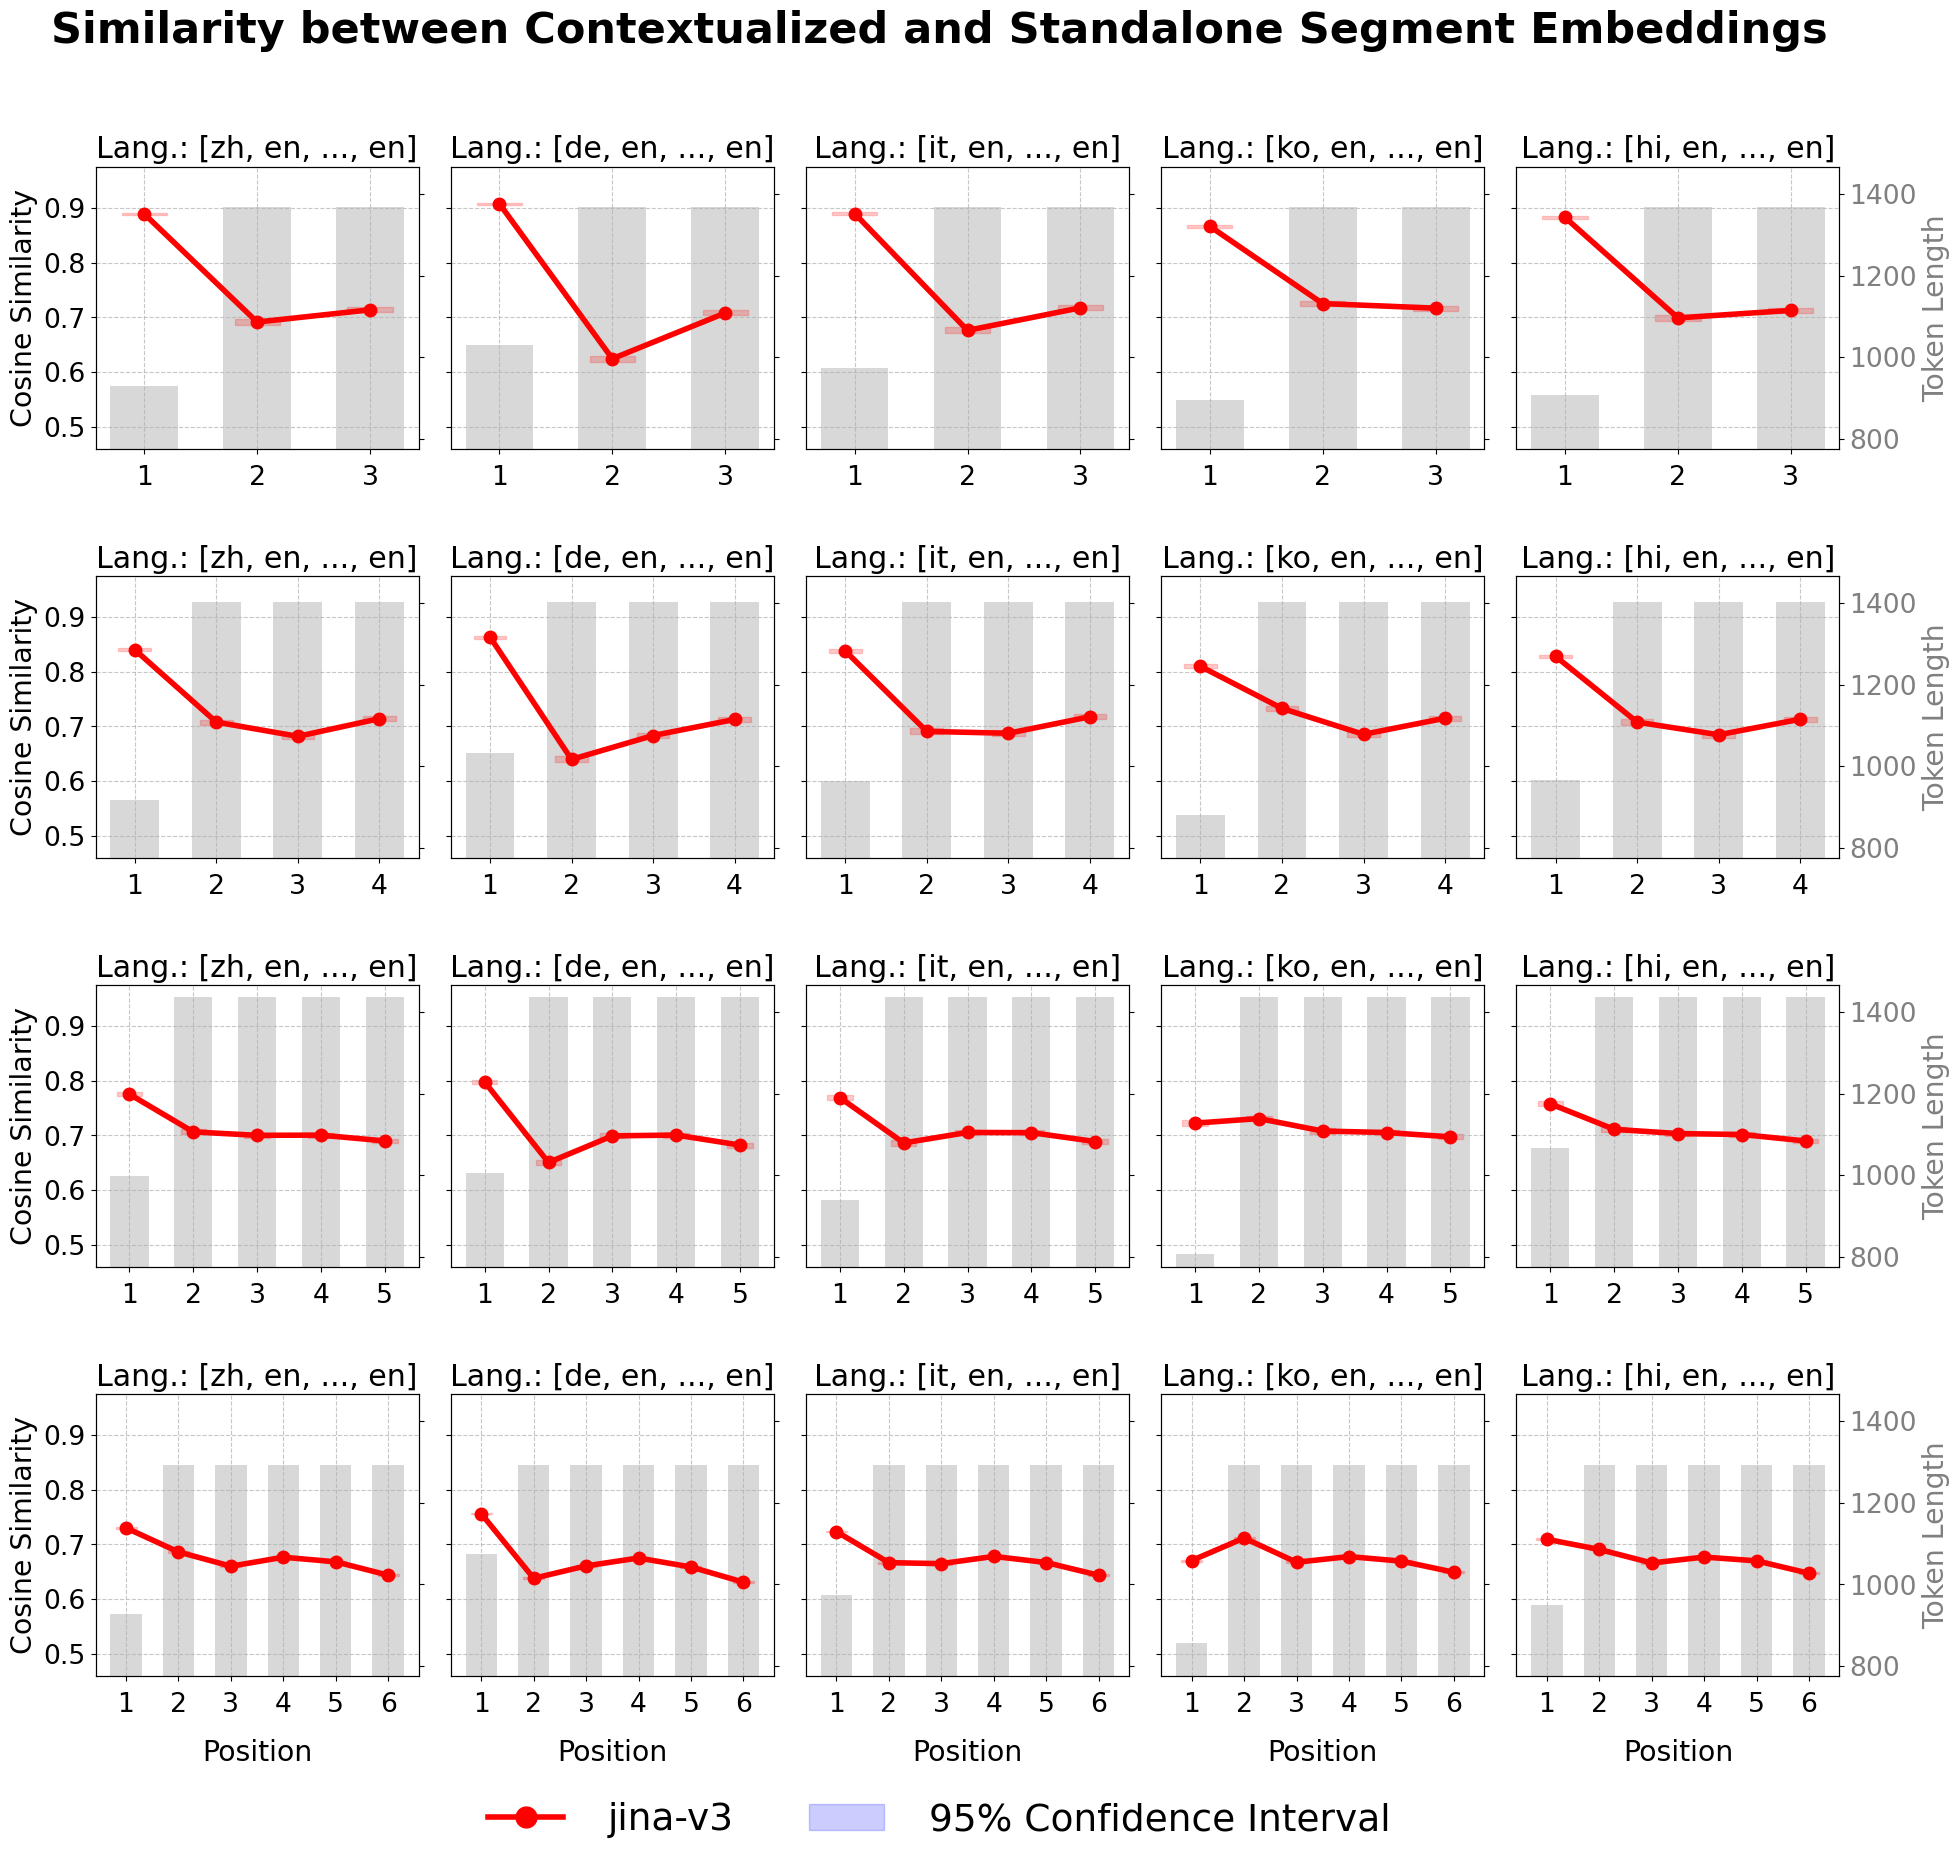

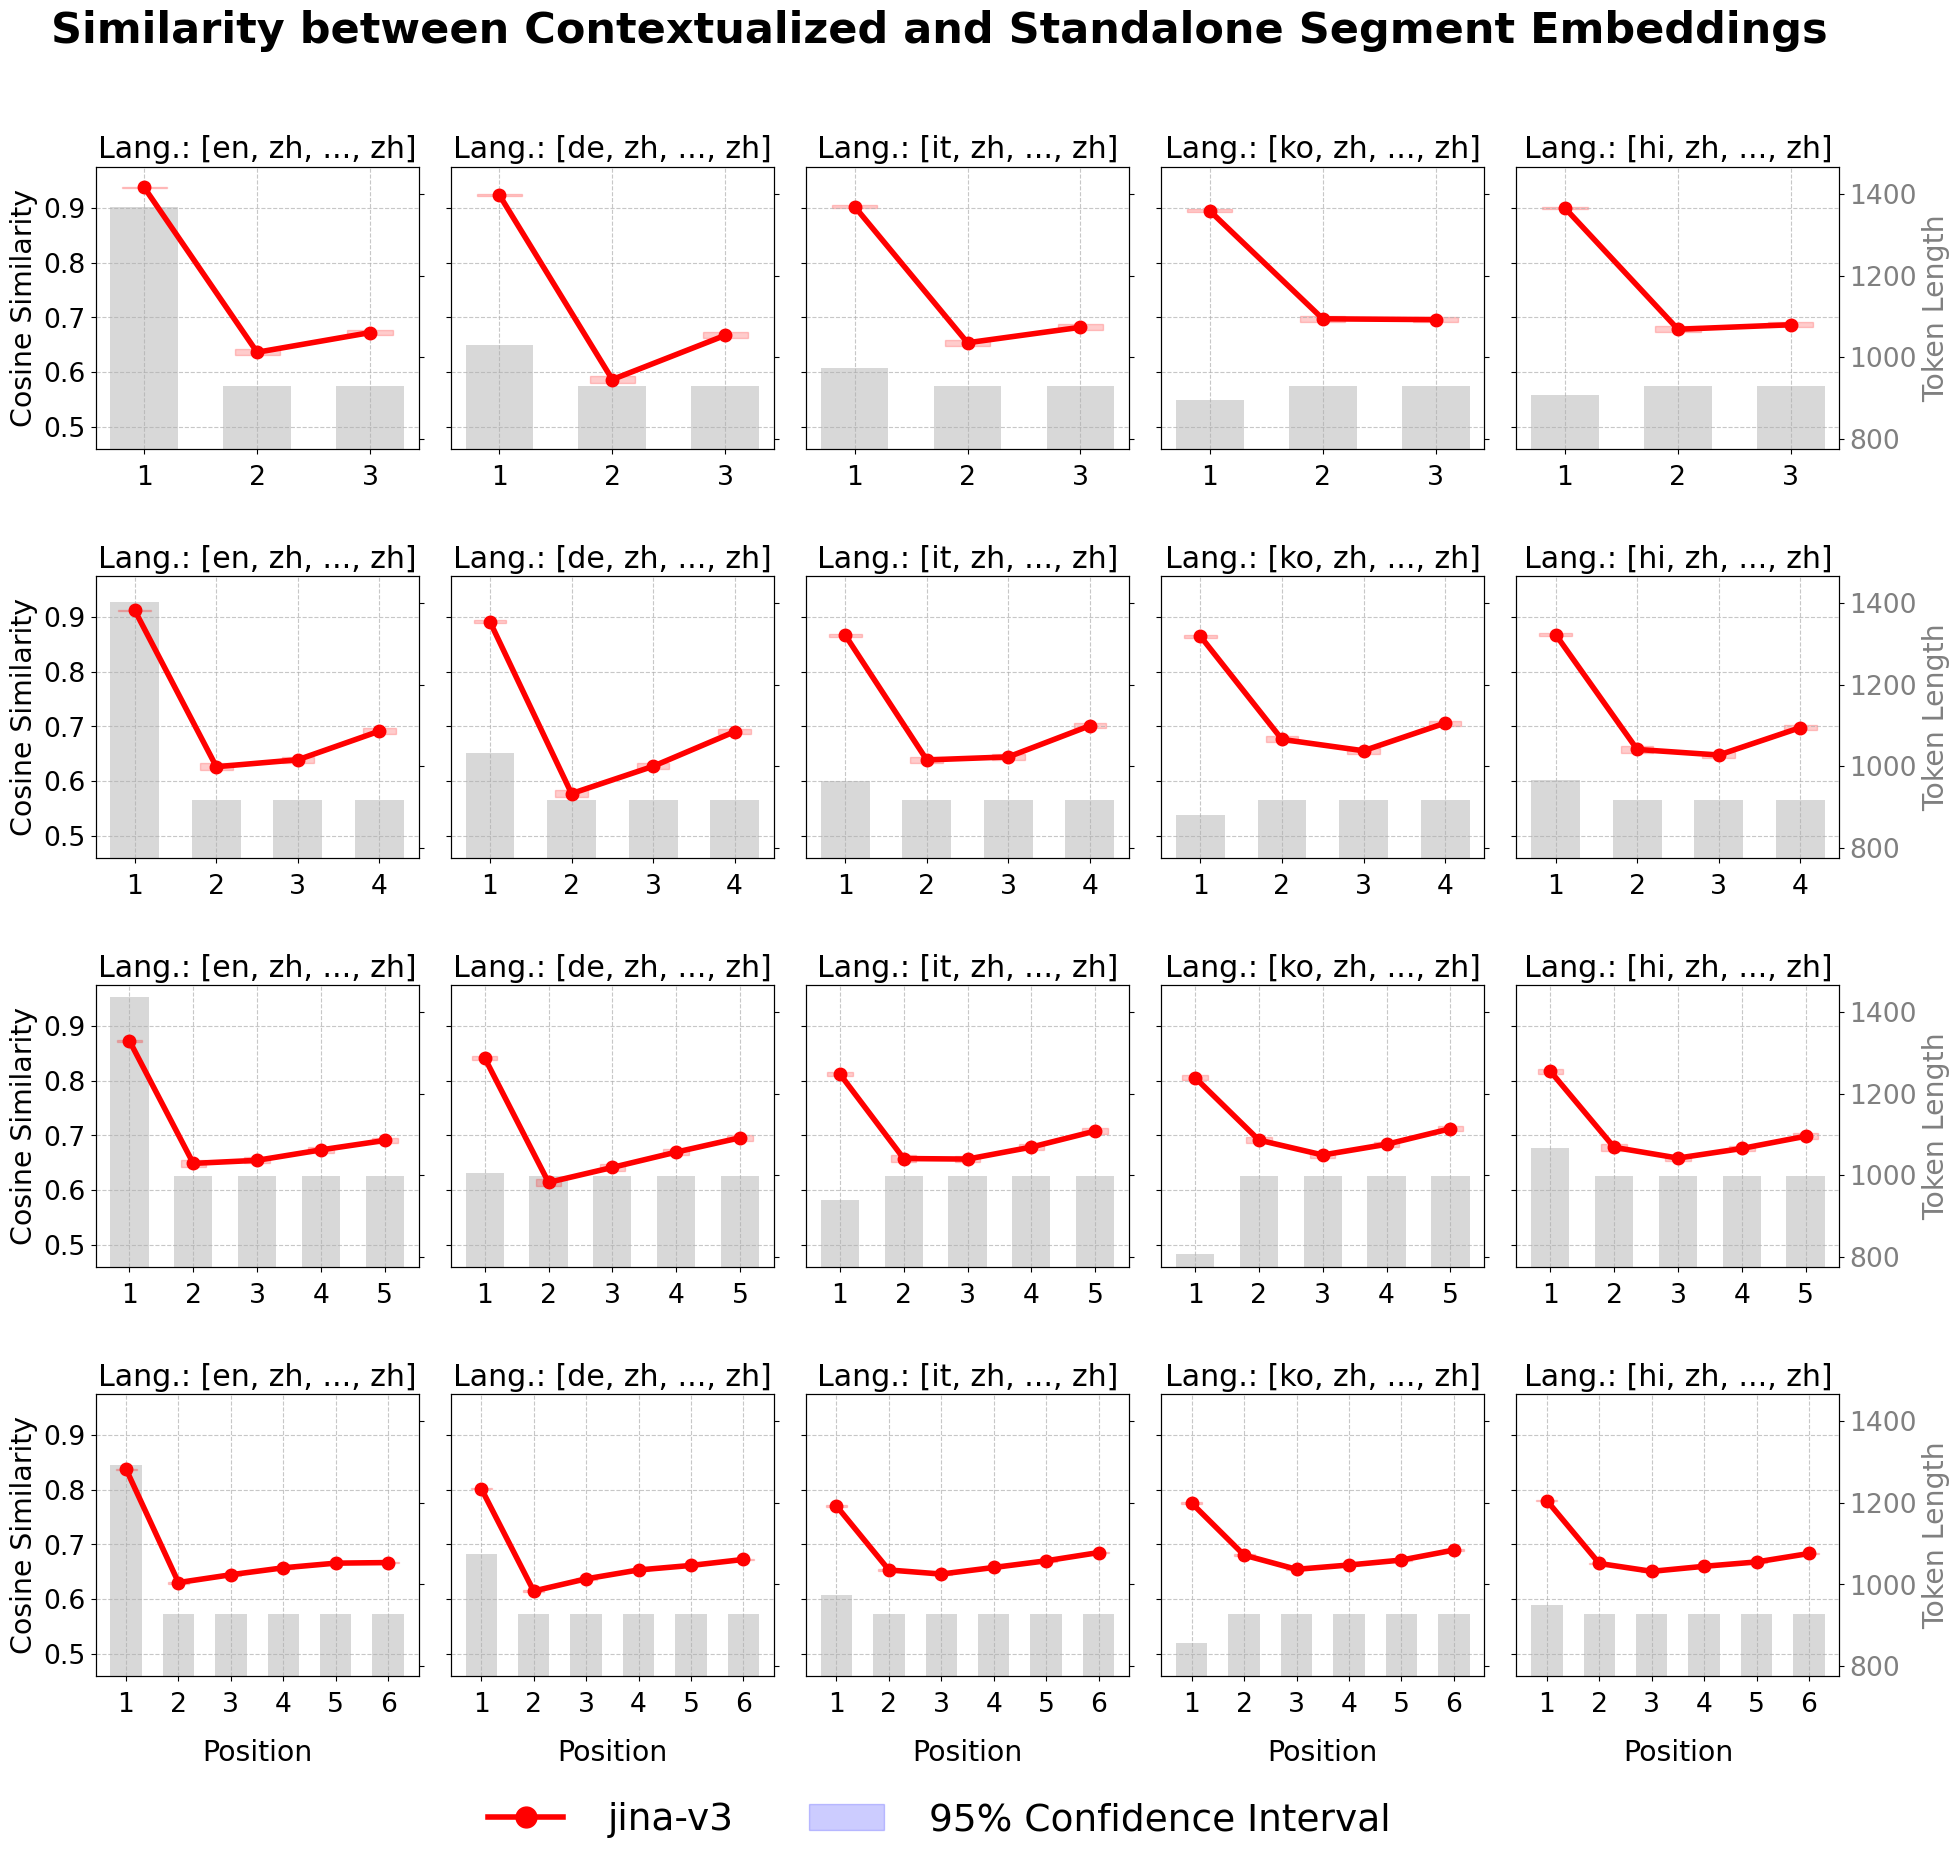

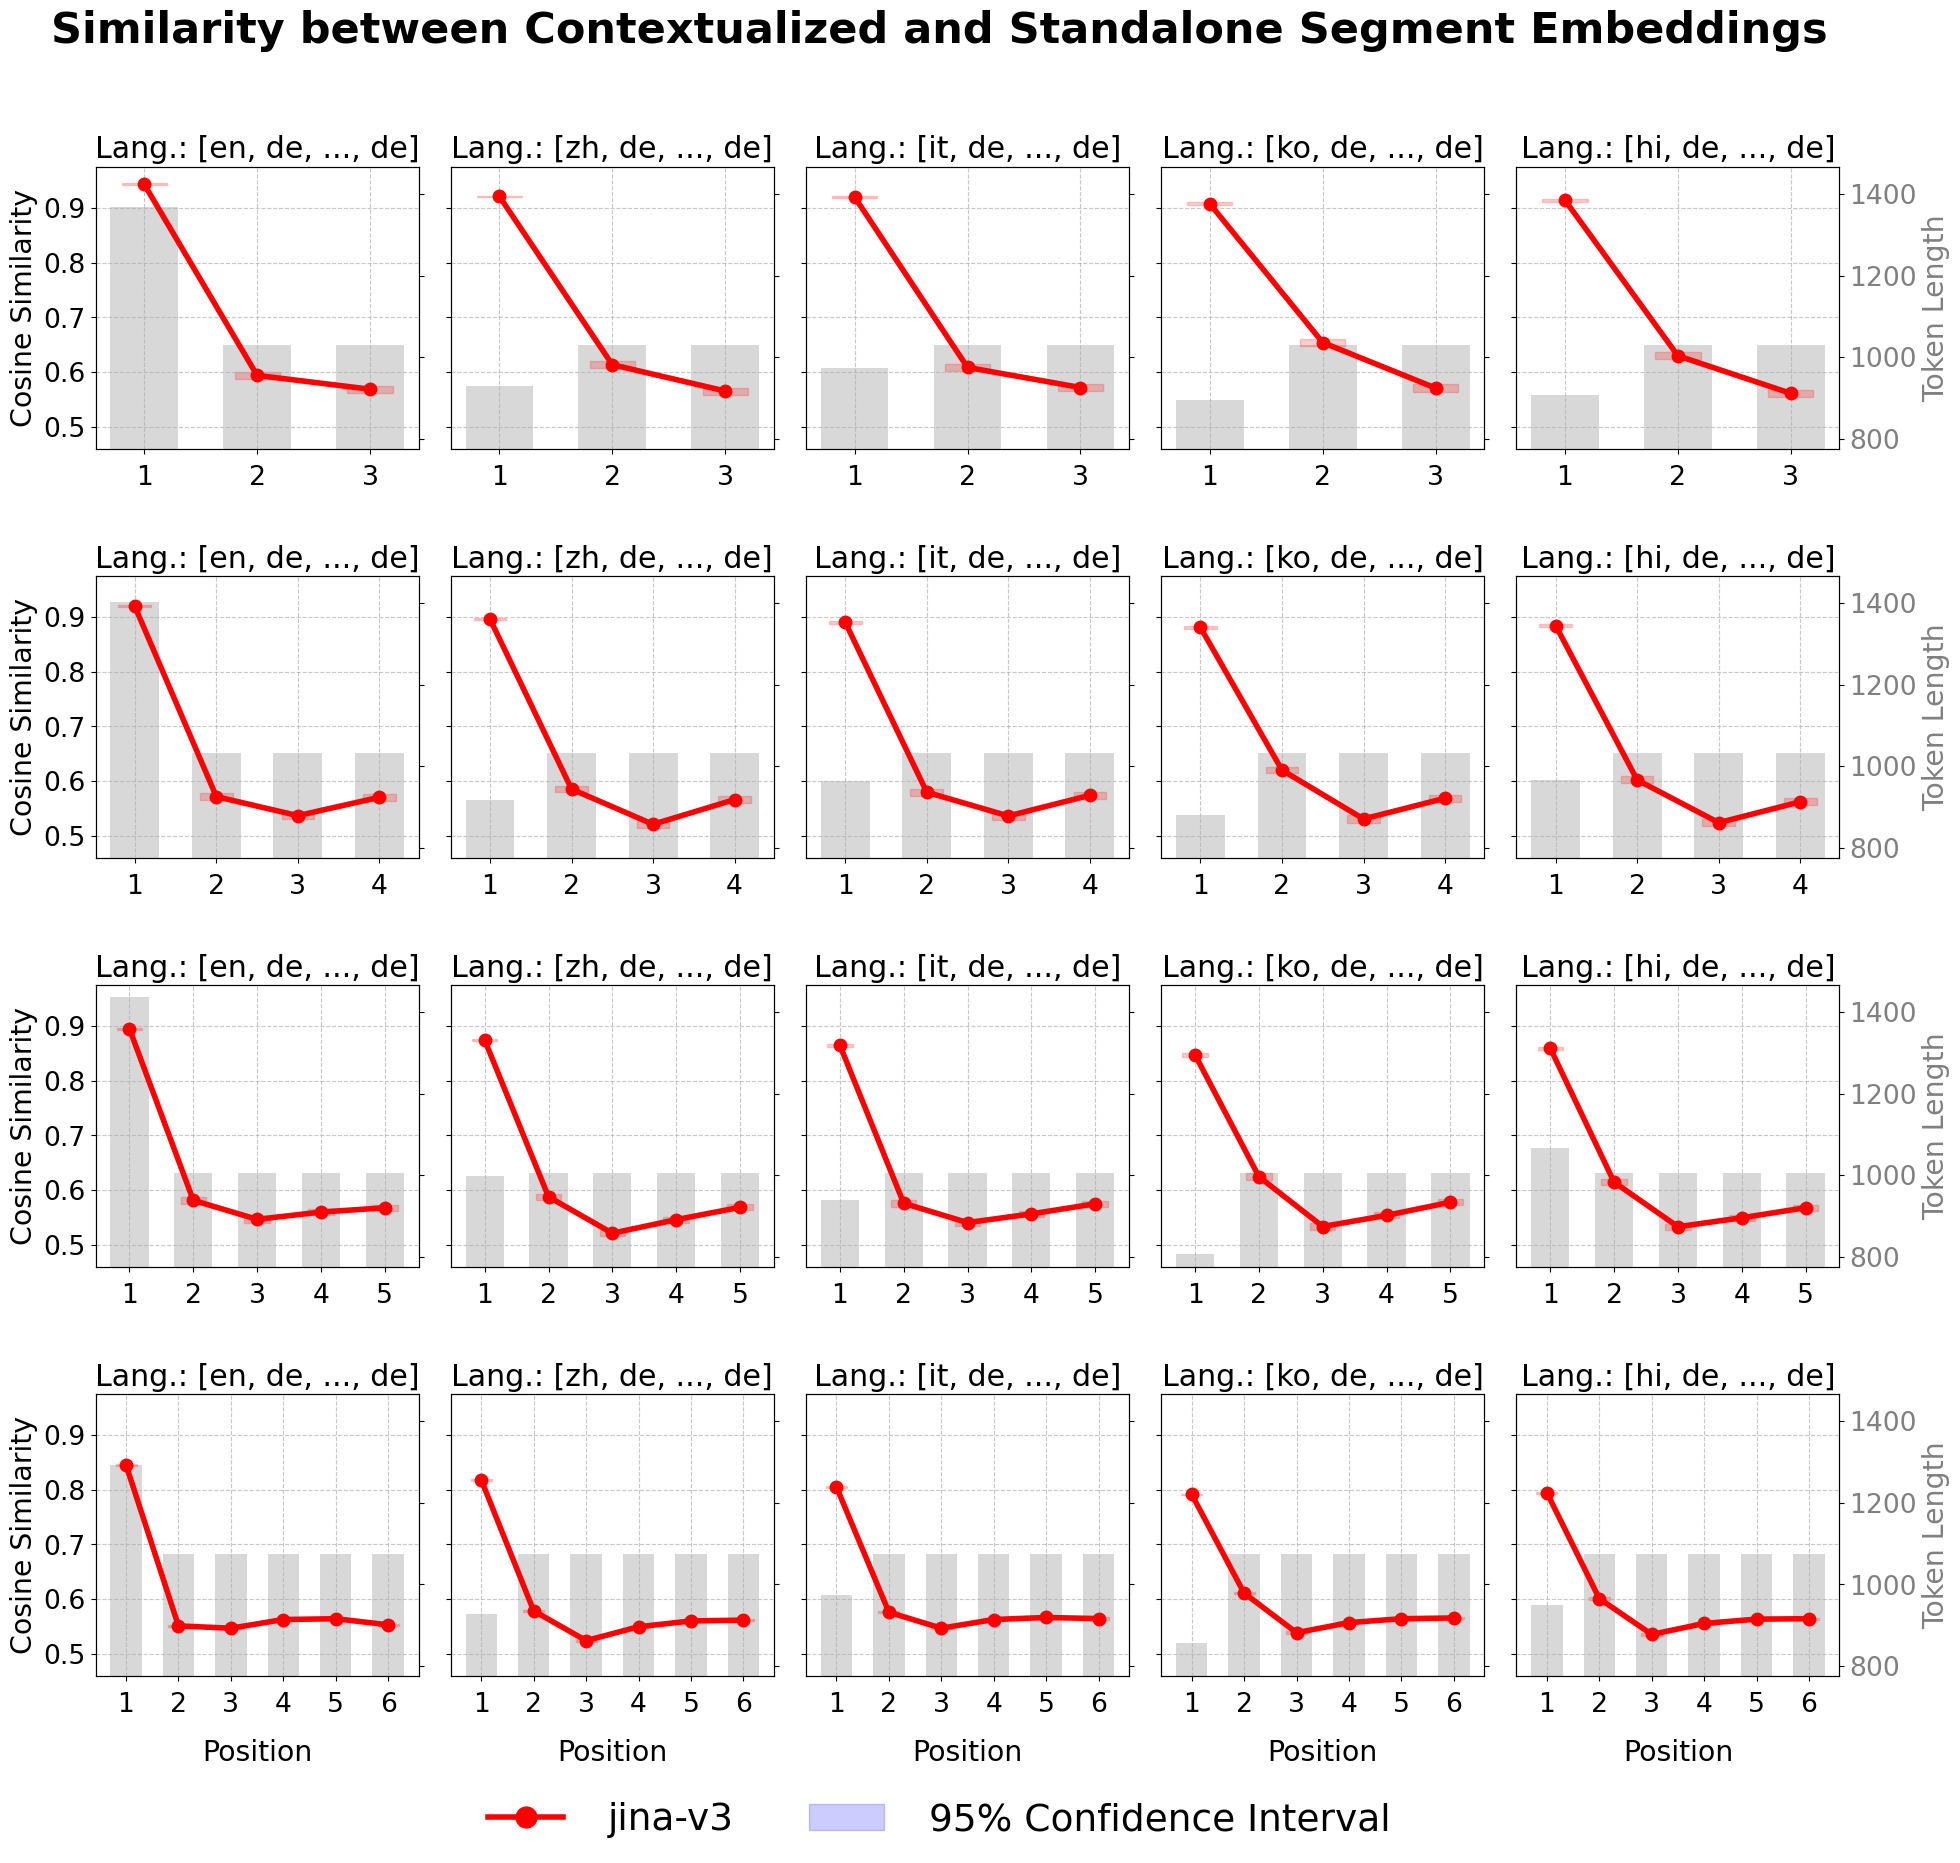

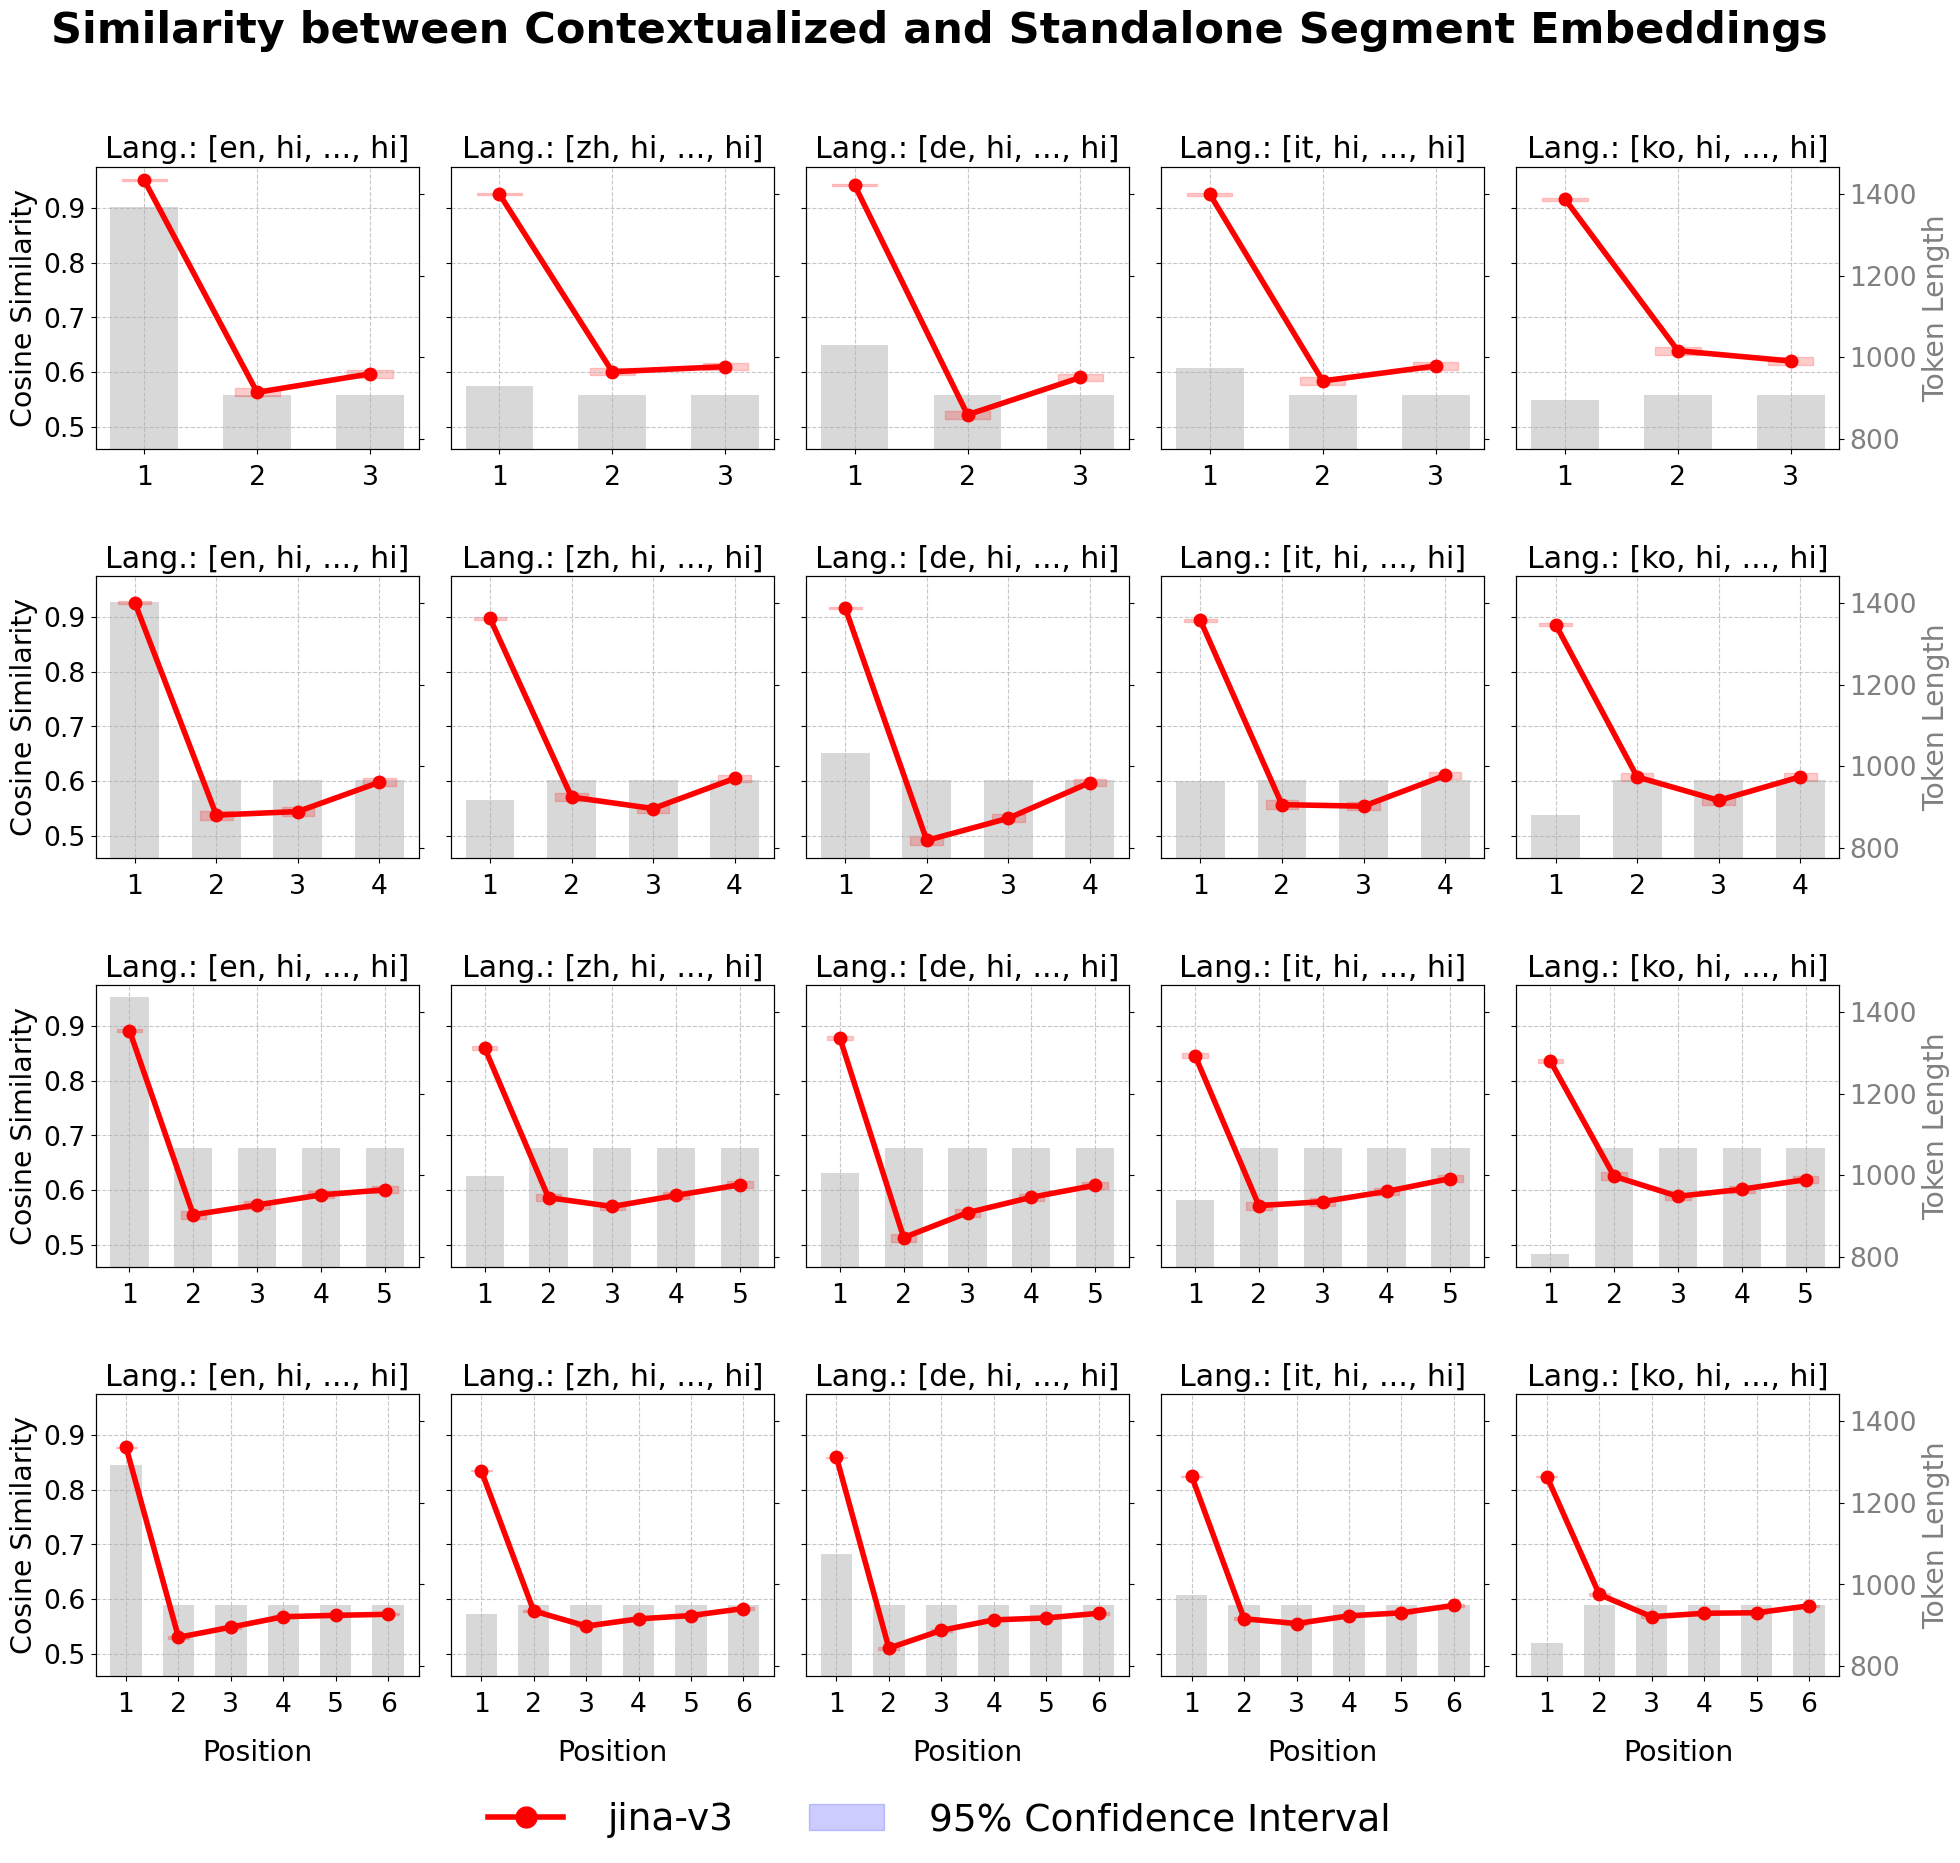

In [7]:
latechunk2standalone_plotter.plot(PATHS_JINA_MULTI, pooling_strategy_segment_standalone="mean", show_lengths=True, split_plots_by_source_lang=True)

# Plots Calibrated vs. Non-Calibrated Embeddings (Experiment 1)

In [12]:
PATHS_MGTE_MONO, PATHS_MGTE_MULTI = categorize_paths_by_root("results/attn_clb", "Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__", language_order=language_order)

PATHS_MONO = [p for p in PATHS_MGTE_MONO if "lcLH" not in p]
PATHS_MULTI = [p for p in PATHS_MGTE_MULTI if "lcLH" not in p]

PATHS_MONO_DOC_ONLY = [p for p in PATHS_MGTE_MONO if "lcLH" in p]


NO_CALIB_PATHS_MONO = [
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__it__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__it__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__it__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__ko__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__ko__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__ko__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__hi__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__hi__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__hi__concat-size5__range1000-2000",
]


NO_CALIB_PATHS_MULTI = [
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_zh__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_zh__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_zh__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_de__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_de__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_de__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_it__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_it__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_it__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_ko__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_ko__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_ko__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_hi__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_hi__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__en_hi__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_en__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_en__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_en__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_de__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_de__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_de__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_it__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_it__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_it__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_ko__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_ko__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_ko__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_hi__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_hi__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__zh_hi__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_en__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_en__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_en__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_zh__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_zh__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_zh__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_it__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_it__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_it__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_ko__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_ko__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_ko__concat-size5__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_hi__concat-size3__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_hi__concat-size4__range1000-2000",
    "results/wiki_parallel/Alibaba-NLP_gte-multilingual-base__wiki_parallel_en_de_hi_it_ko_zh__parallel__de_hi__concat-size5__range1000-2000",
]

PATHS_MONO = NO_CALIB_PATHS_MONO + PATHS_MONO
PATHS_MULTI = NO_CALIB_PATHS_MULTI + PATHS_MULTI
PATHS_MONO_DOC_ONLY = NO_CALIB_PATHS_MONO + PATHS_MONO_DOC_ONLY


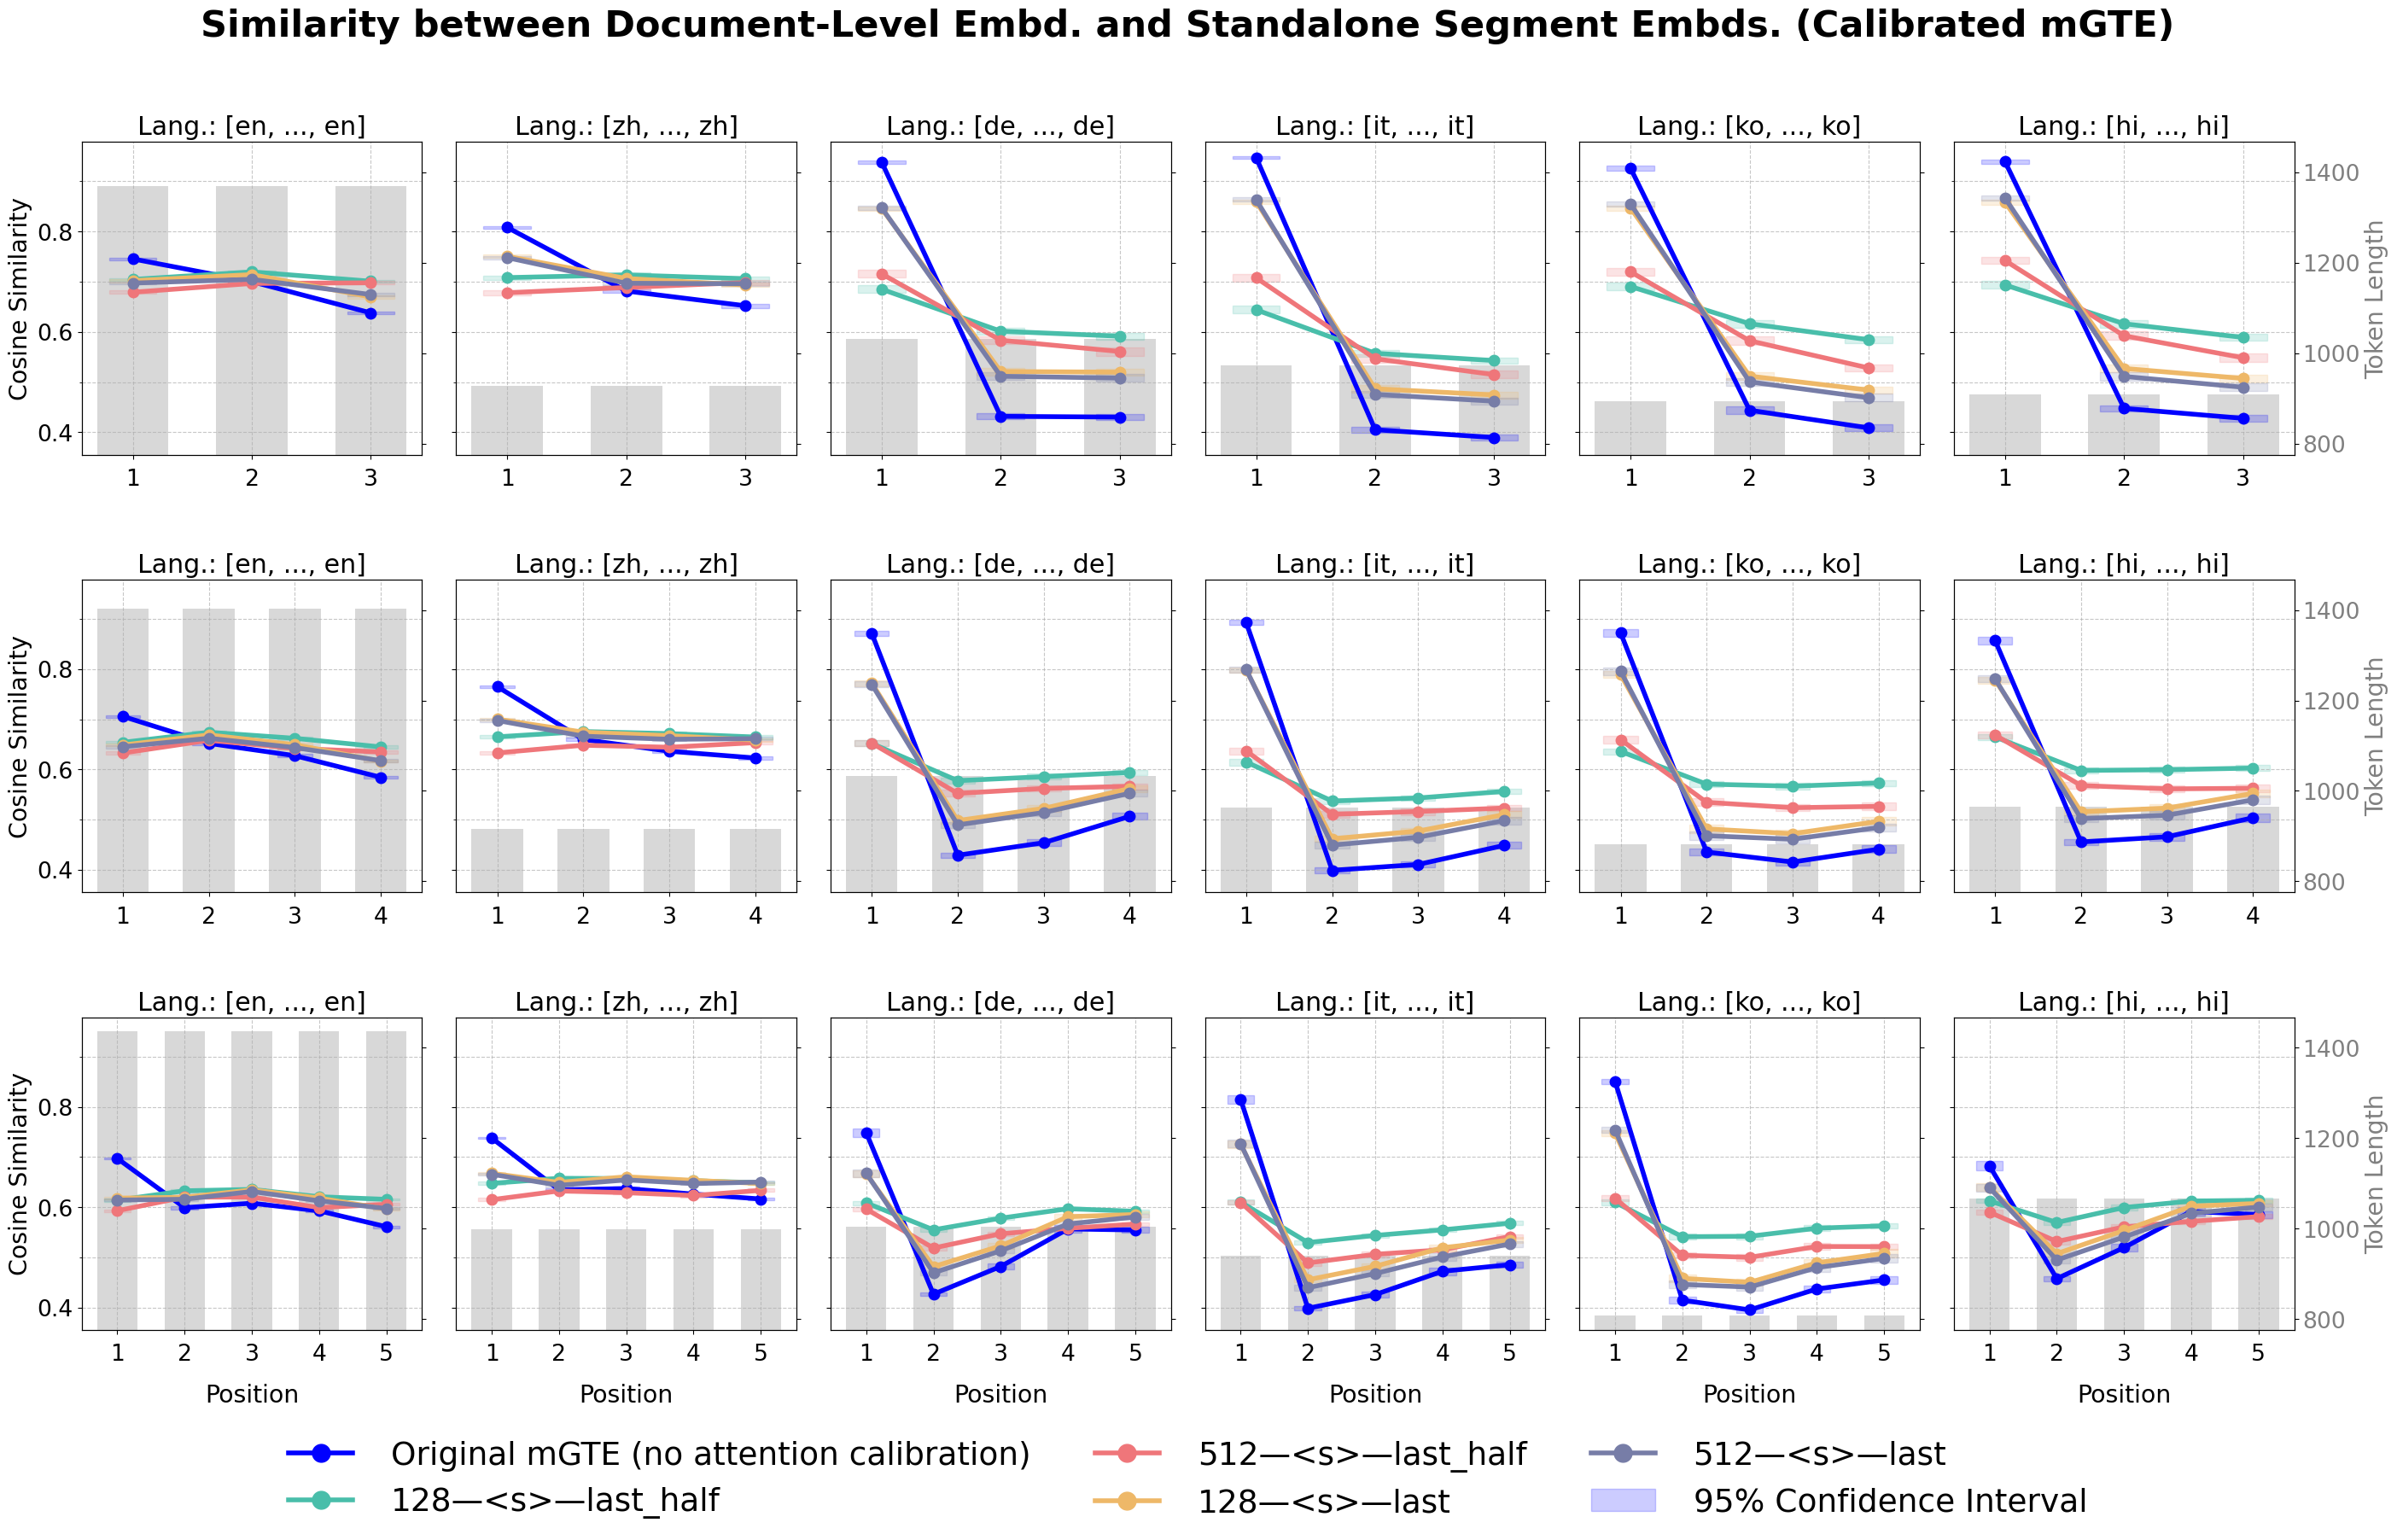

In [9]:
position_plotter.plot_multi_calibrations(
    paths=PATHS_MONO,
    pooling_strategy=model_pooling_strats["Alibaba-NLP/gte-multilingual-base"],
    show_lengths=True
    )

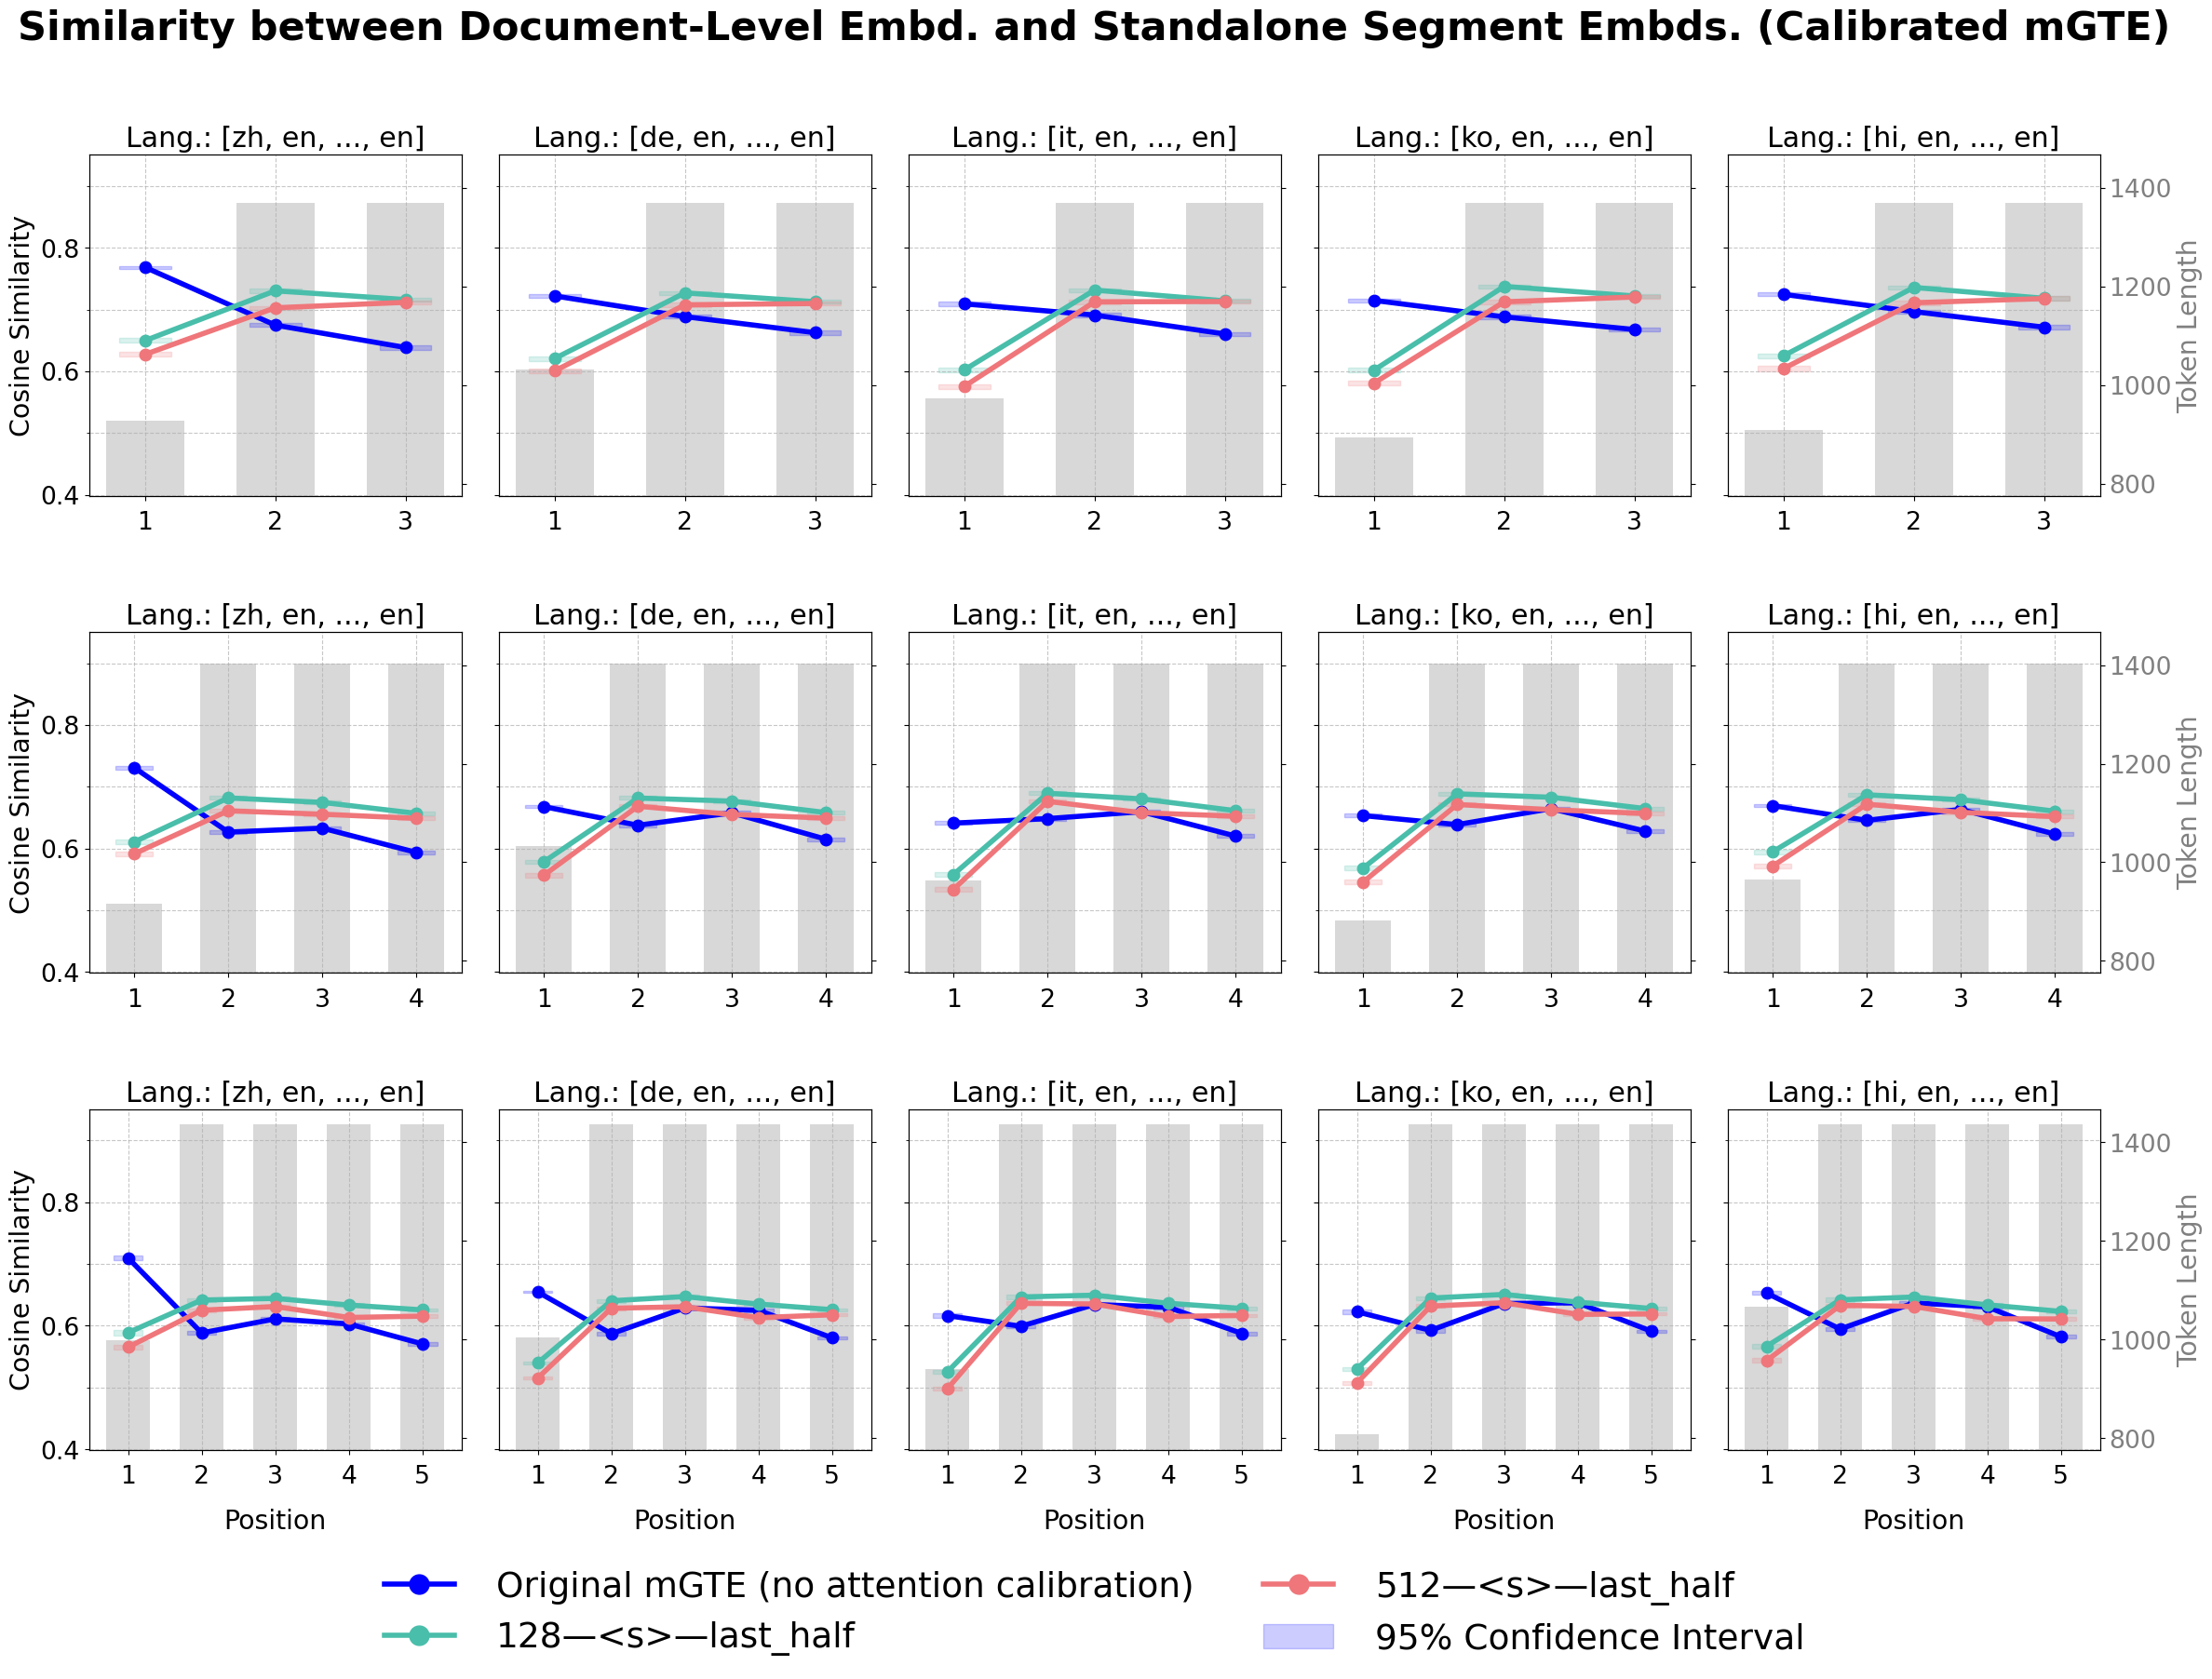

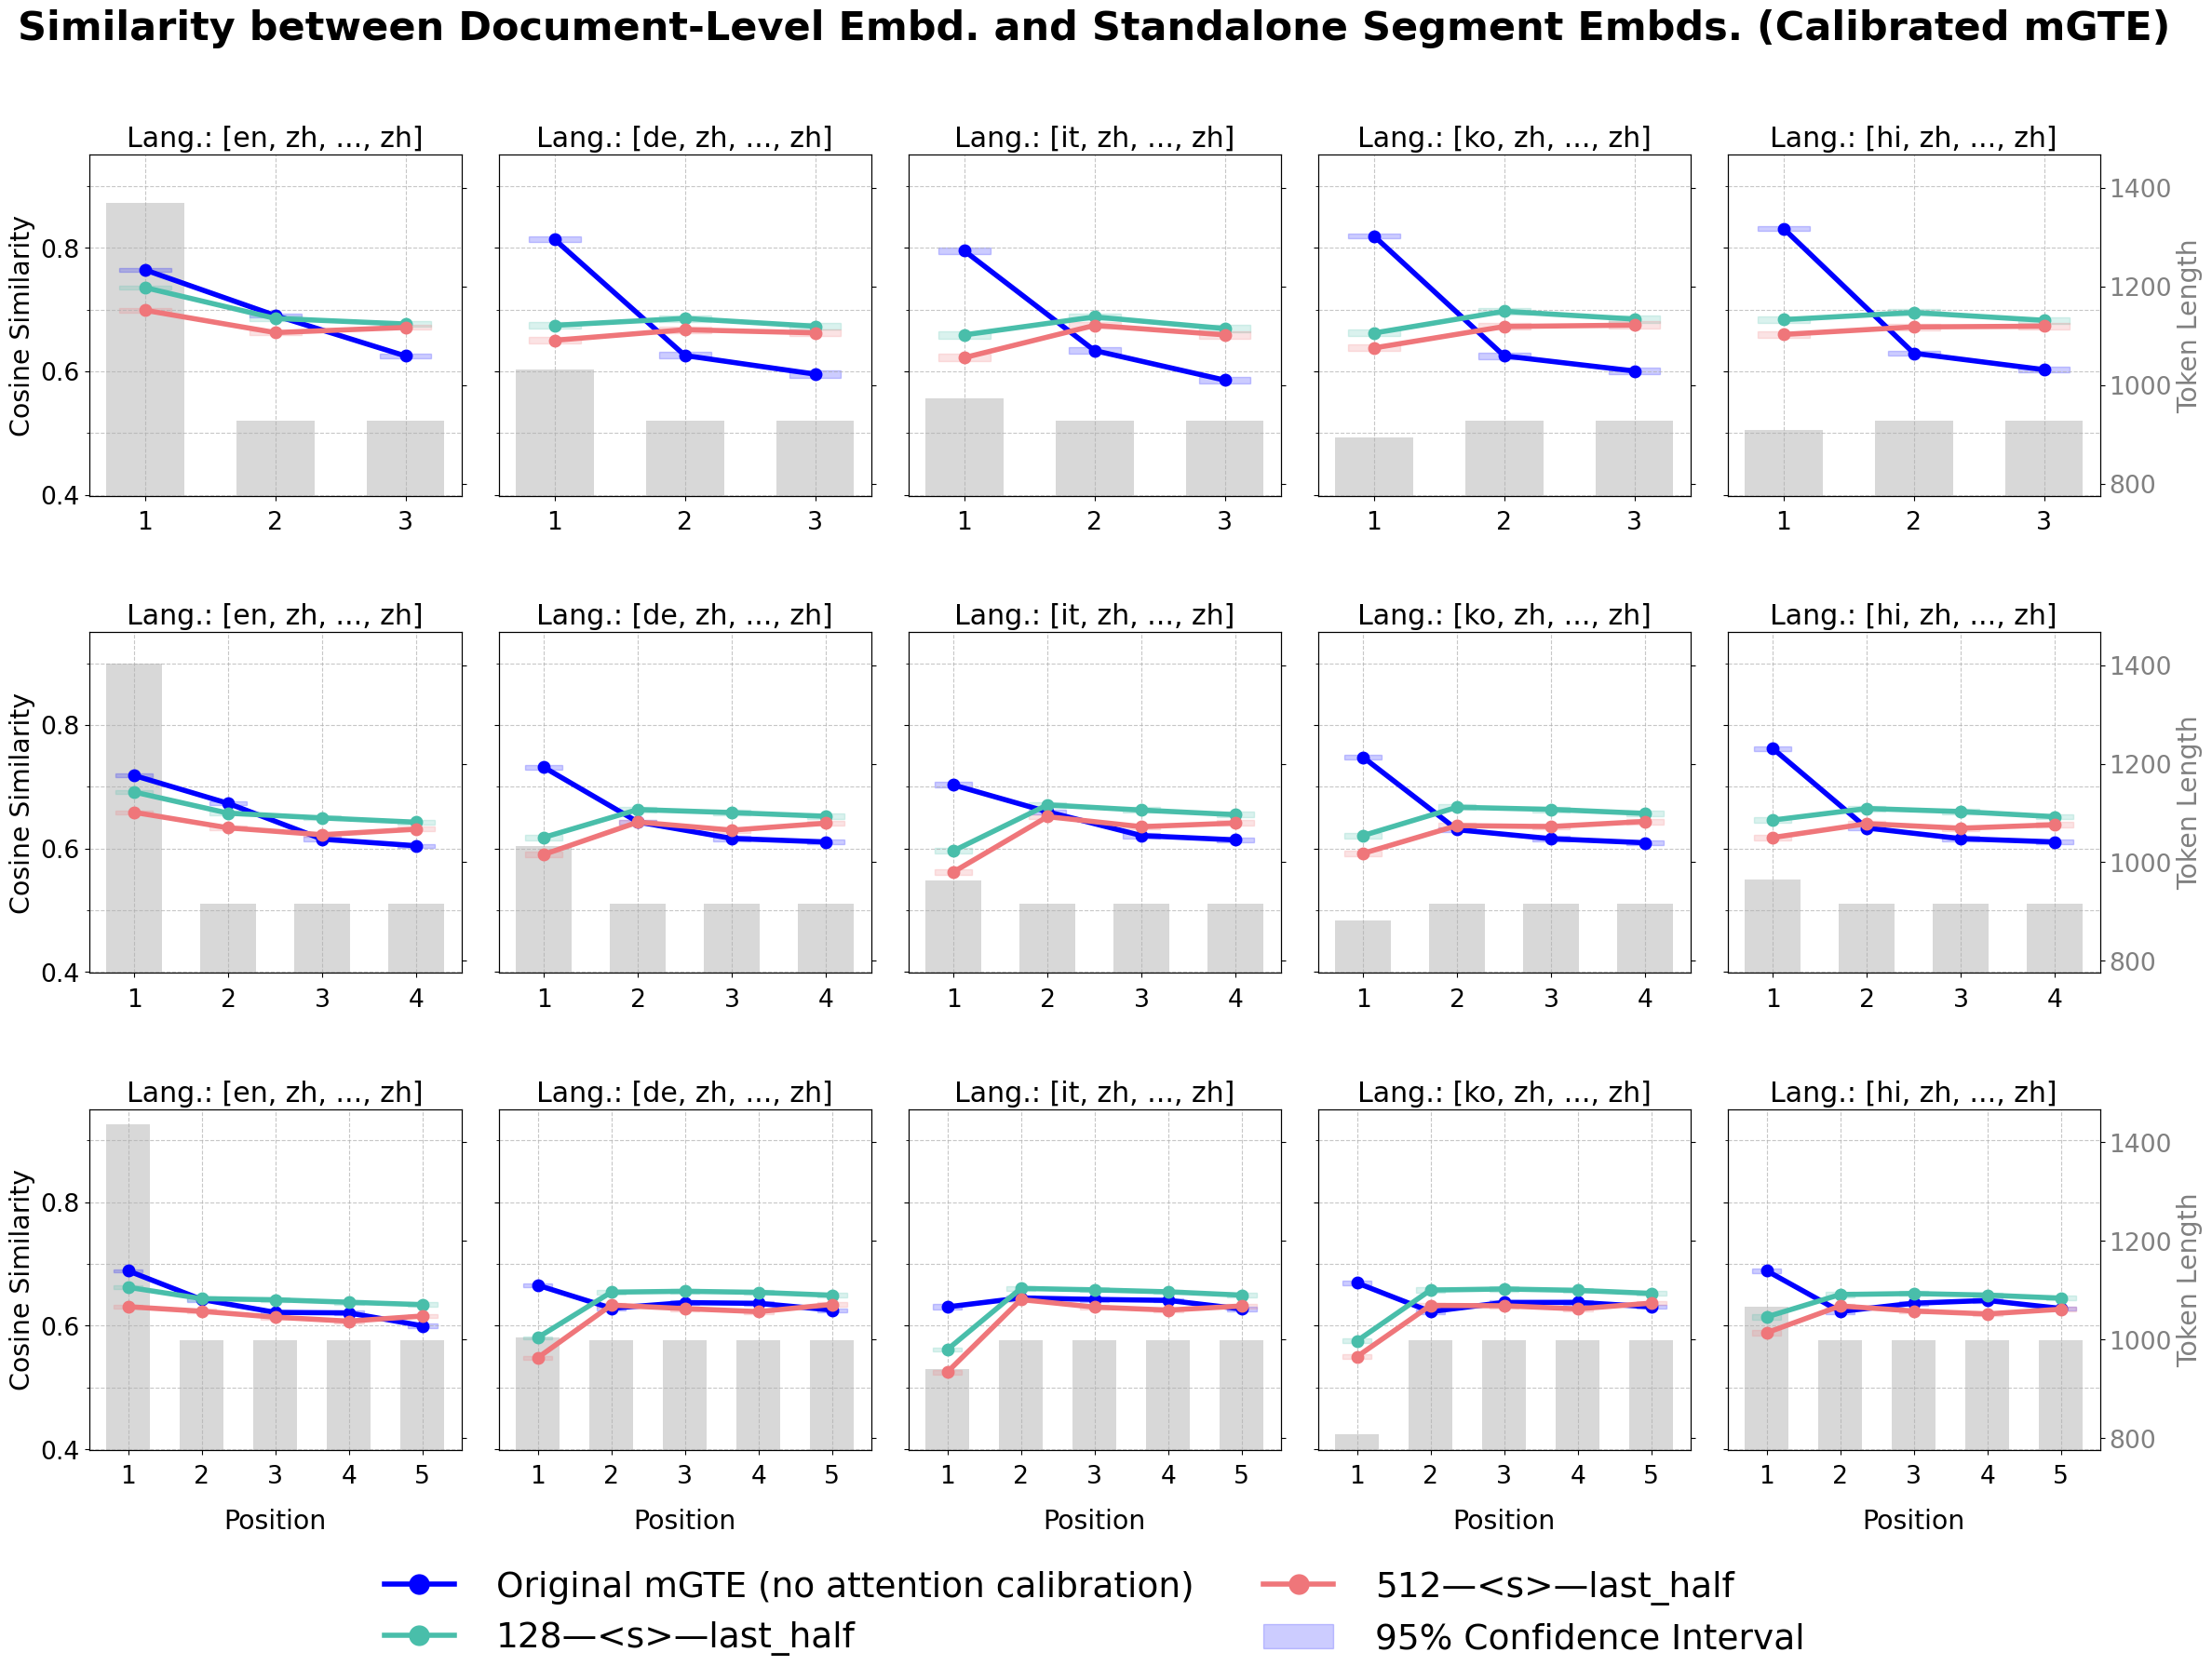

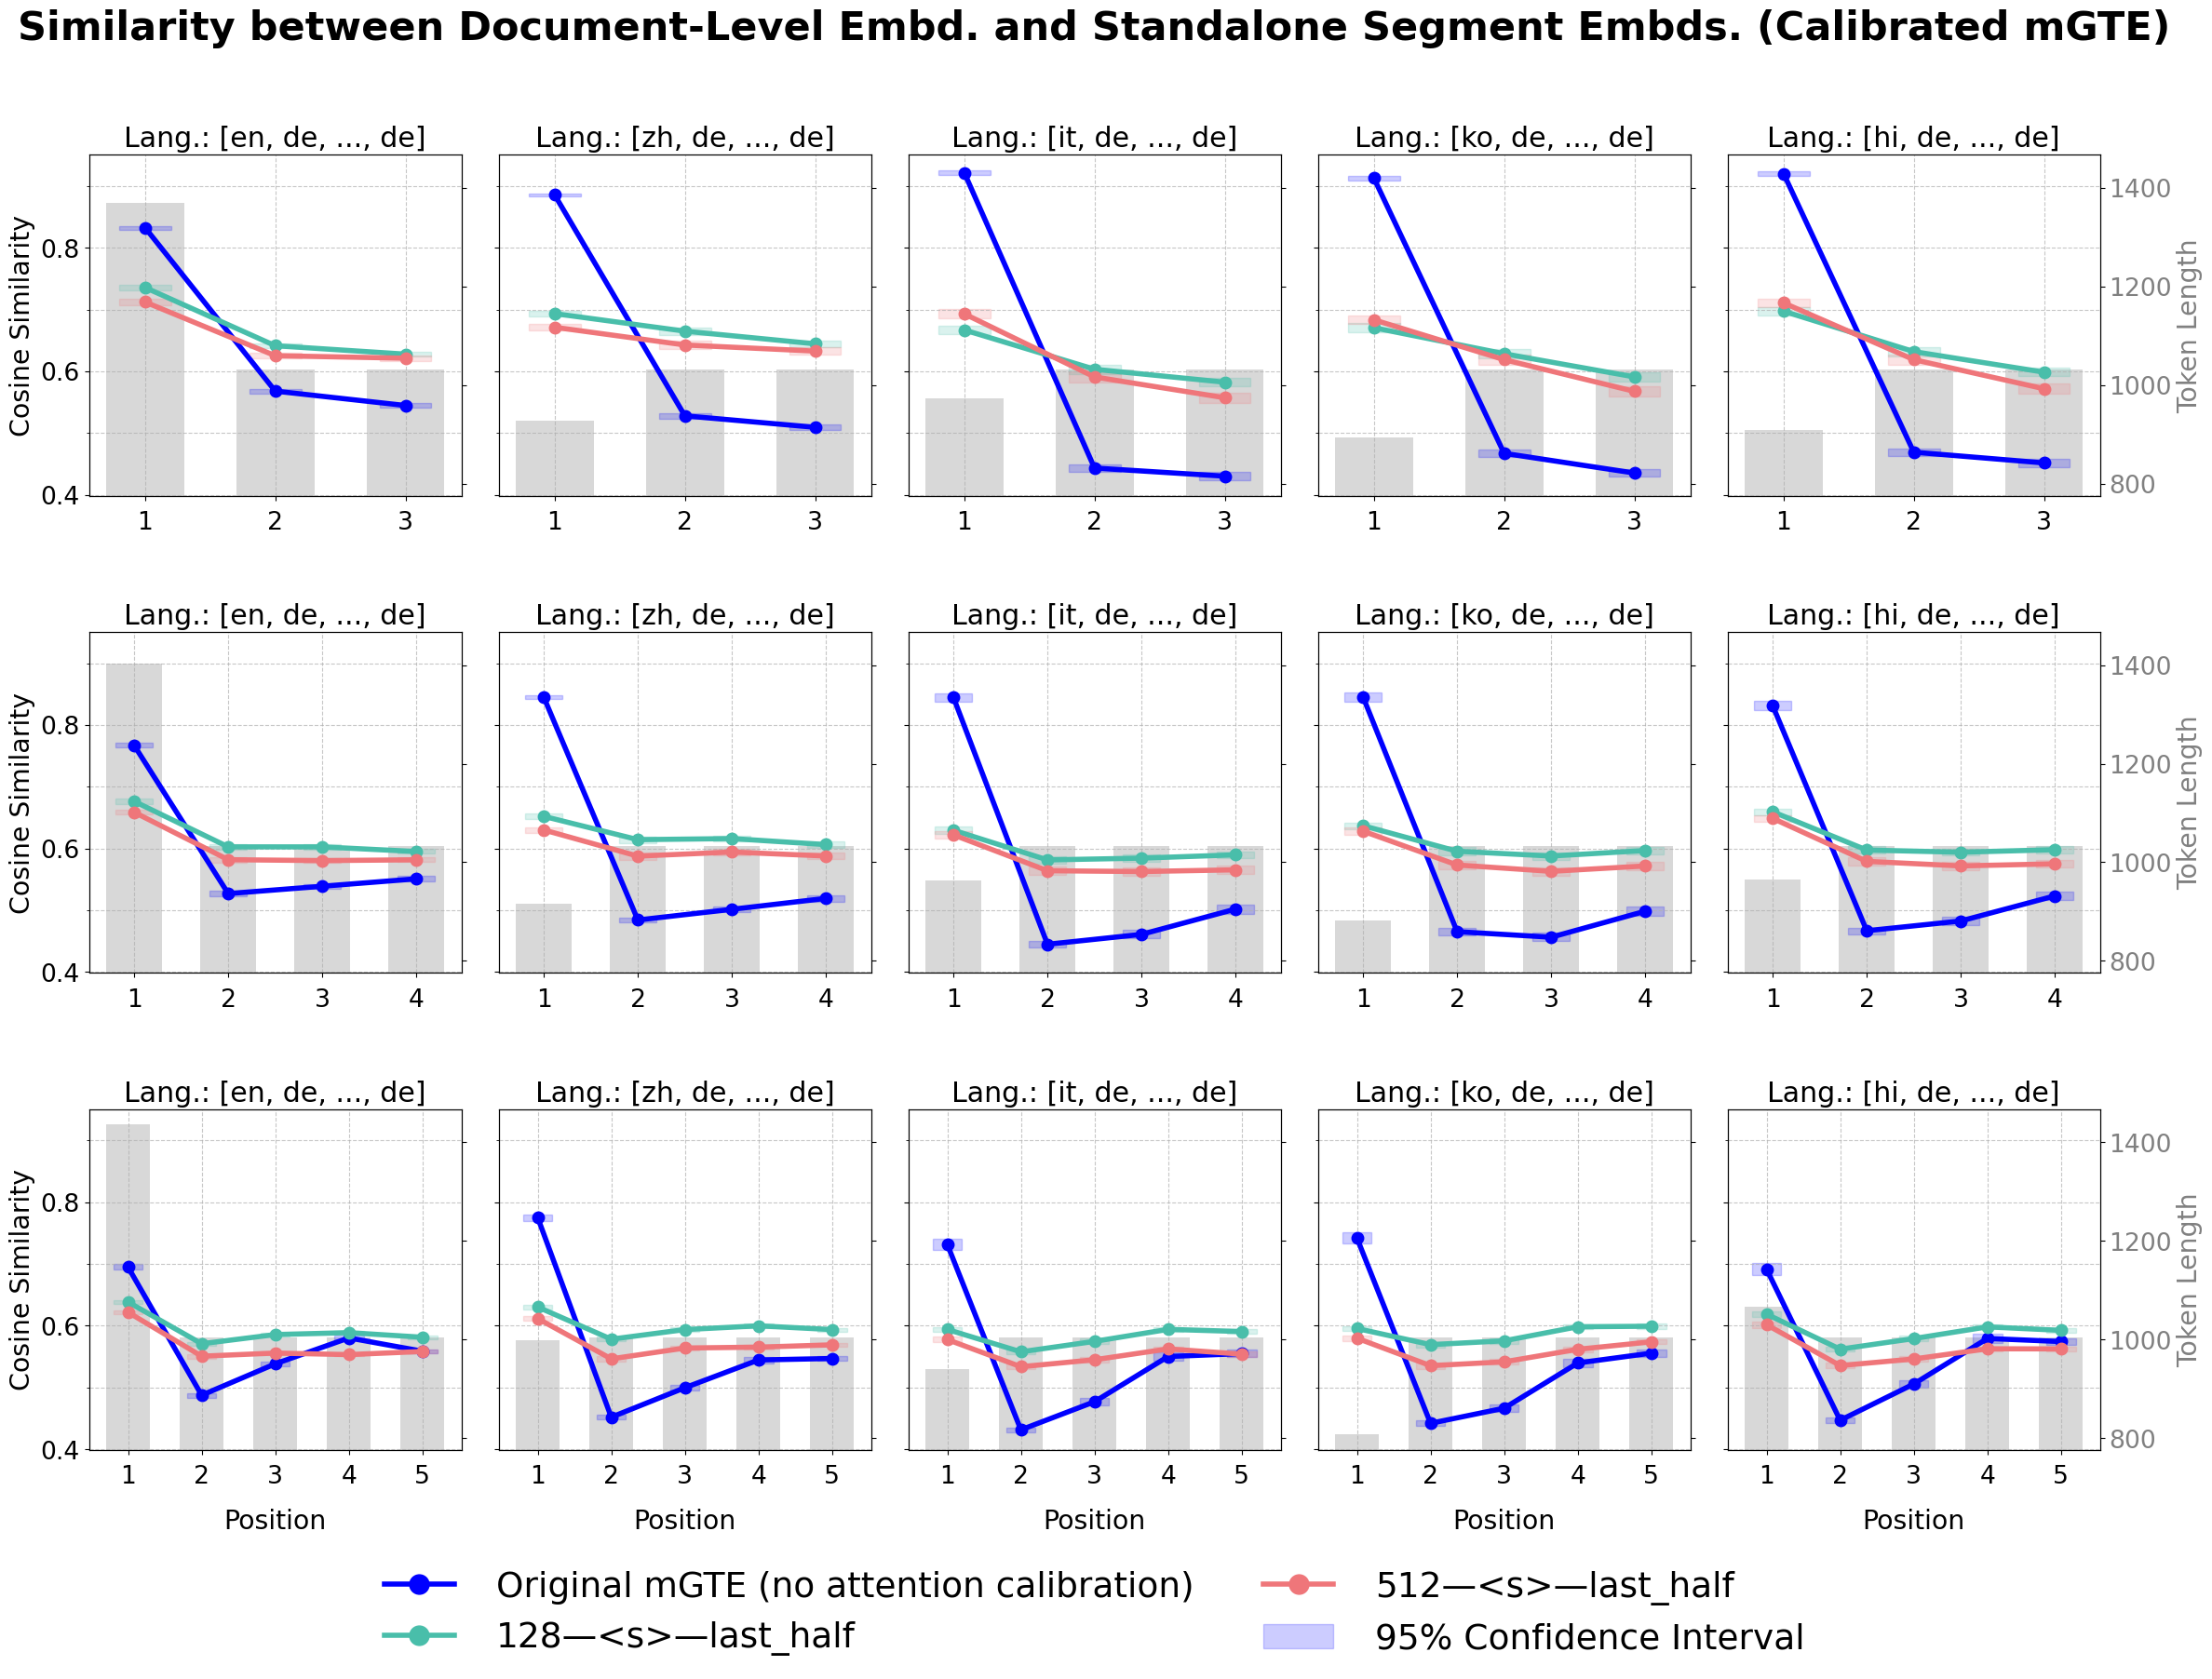

In [10]:
position_plotter.plot_multi_calibrations(
    paths=PATHS_MULTI,
    pooling_strategy=model_pooling_strats["Alibaba-NLP/gte-multilingual-base"],
    show_lengths=True,
    split_plots_by_source_lang=True
    )

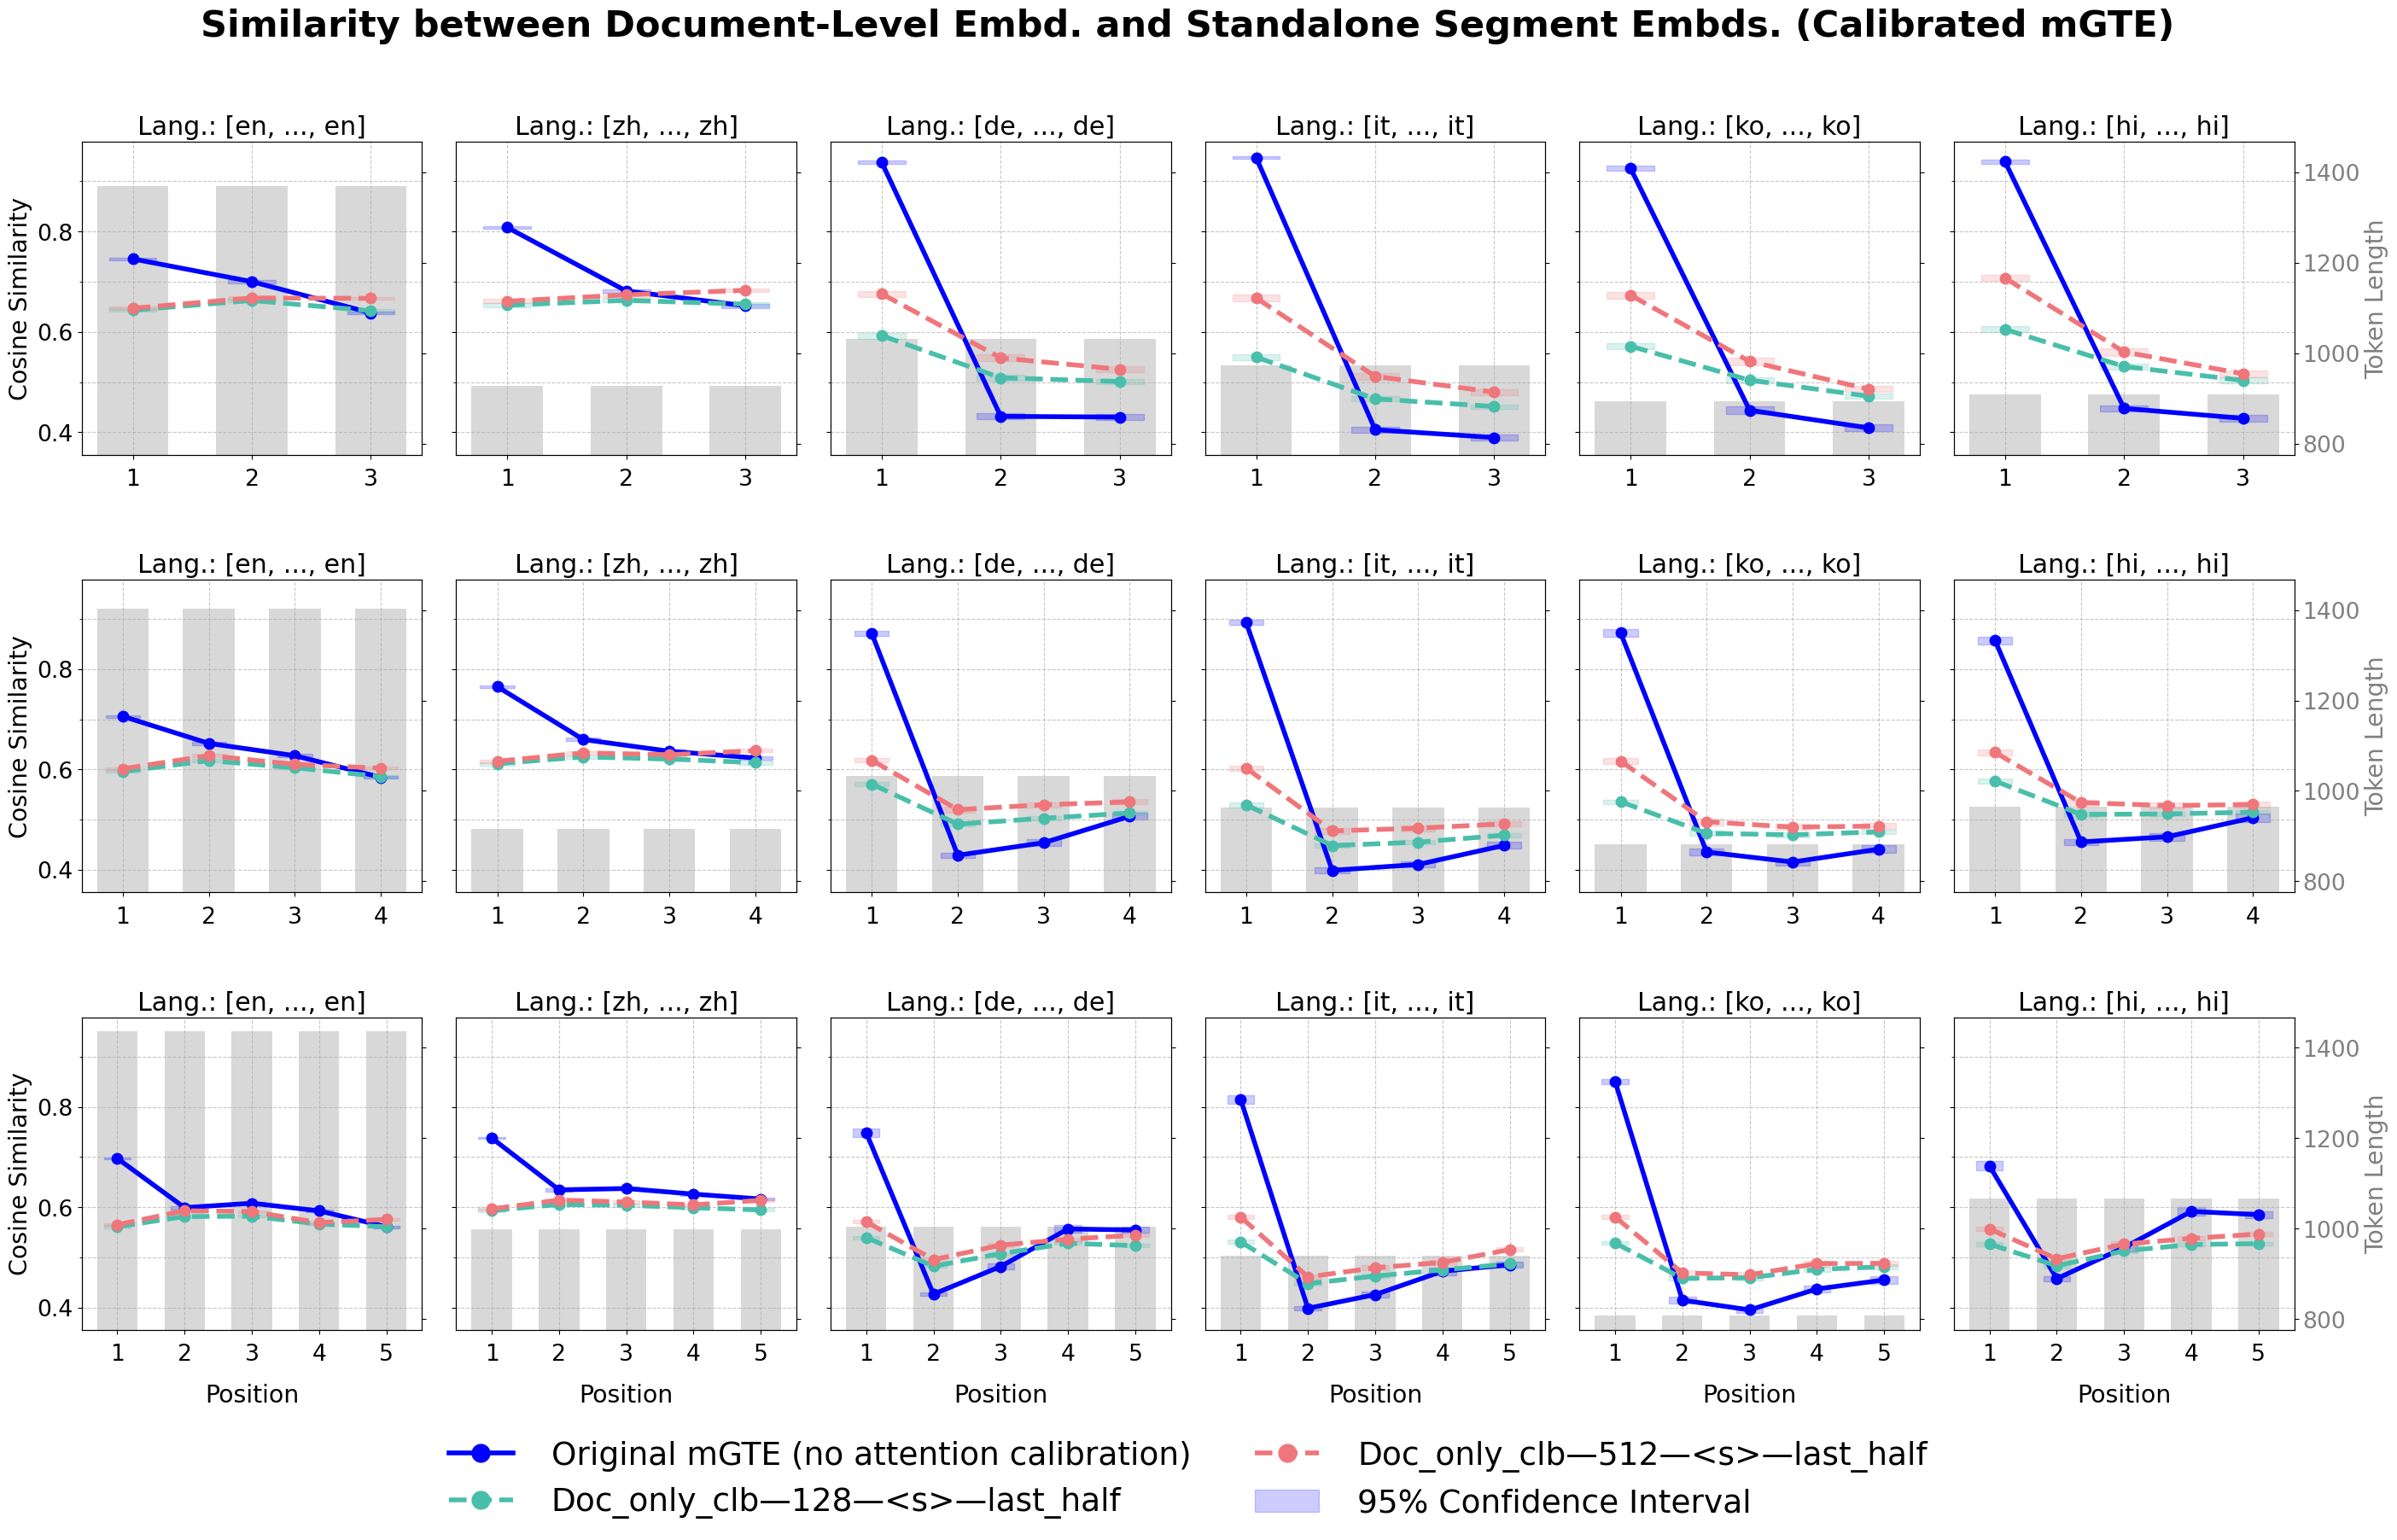

In [13]:
position_plotter.plot_multi_calibrations(
    paths=PATHS_MONO_DOC_ONLY,
    pooling_strategy=model_pooling_strats["Alibaba-NLP/gte-multilingual-base"],
    show_lengths=True
    )